In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
dataset = pd.read_csv('/content/predictive_maintenance.csv')

In [ ]:
dataset.head()

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target Failure Type  
0                    1551         42.8                0       0   No Failure  
1                    1408         46.3                3       0   No Failure  
2                    1498         49.4                5       0   No Failure  
3                    1433         39.5                7       0   No Failure  
4                    1408         40.0                9       0   No Failure

In [ ]:
dataset['Failure Type'].value_counts()

Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64

In [ ]:
dataset.describe().transpose()

count        mean          std     min      25%  \
UDI                      10000.0  5000.50000  2886.895680     1.0  2500.75   
Air temperature [K]      10000.0   300.00493     2.000259   295.3   298.30   
Process temperature [K]  10000.0   310.00556     1.483734   305.7   308.80   
Rotational speed [rpm]   10000.0  1538.77610   179.284096  1168.0  1423.00   
Torque [Nm]              10000.0    39.98691     9.968934     3.8    33.20   
Tool wear [min]          10000.0   107.95100    63.654147     0.0    53.00   
Target                   10000.0     0.03390     0.180981     0.0     0.00   

                            50%      75%      max  
UDI                      5000.5  7500.25  10000.0  
Air temperature [K]       300.1   301.50    304.5  
Process temperature [K]   310.1   311.10    313.8  
Rotational speed [rpm]   1503.0  1612.00   2886.0  
Torque [Nm]                40.1    46.80     76.6  
Tool wear [min]           108.0   162.00    253.0  
Target                      0.0     0.00      1.0

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [ ]:
dataset.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

label_encoder = LabelEncoder()
dataset['Type'] = label_encoder.fit_transform(dataset['Type'])
dataset['Failure Type'] = label_encoder.fit_transform(dataset['Failure Type'])


In [ ]:
dataset.drop(['UDI', 'Product ID'], axis=1, inplace=True)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
dataset[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']] = scaler.fit_transform(
    dataset[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']]
)

In [ ]:
print(dataset['Target'].value_counts())

Target
0    9661
1     339
Name: count, dtype: int64


In [ ]:
dataset.head()

Type  Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0     2            -0.952389                -0.947360                0.068185   
1     1            -0.902393                -0.879959               -0.729472   
2     1            -0.952389                -1.014761               -0.227450   
3     1            -0.902393                -0.947360               -0.590021   
4     1            -0.902393                -0.879959               -0.729472   

   Torque [Nm]  Tool wear [min]  Target  Failure Type  
0     0.282200        -1.695984       0             1  
1     0.633308        -1.648852       0             1  
2     0.944290        -1.617430       0             1  
3    -0.048845        -1.586009       0             1  
4     0.001313        -1.554588       0             1

In [ ]:
corr = dataset.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True, linewidths=2, cmap='viridis')
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.close()

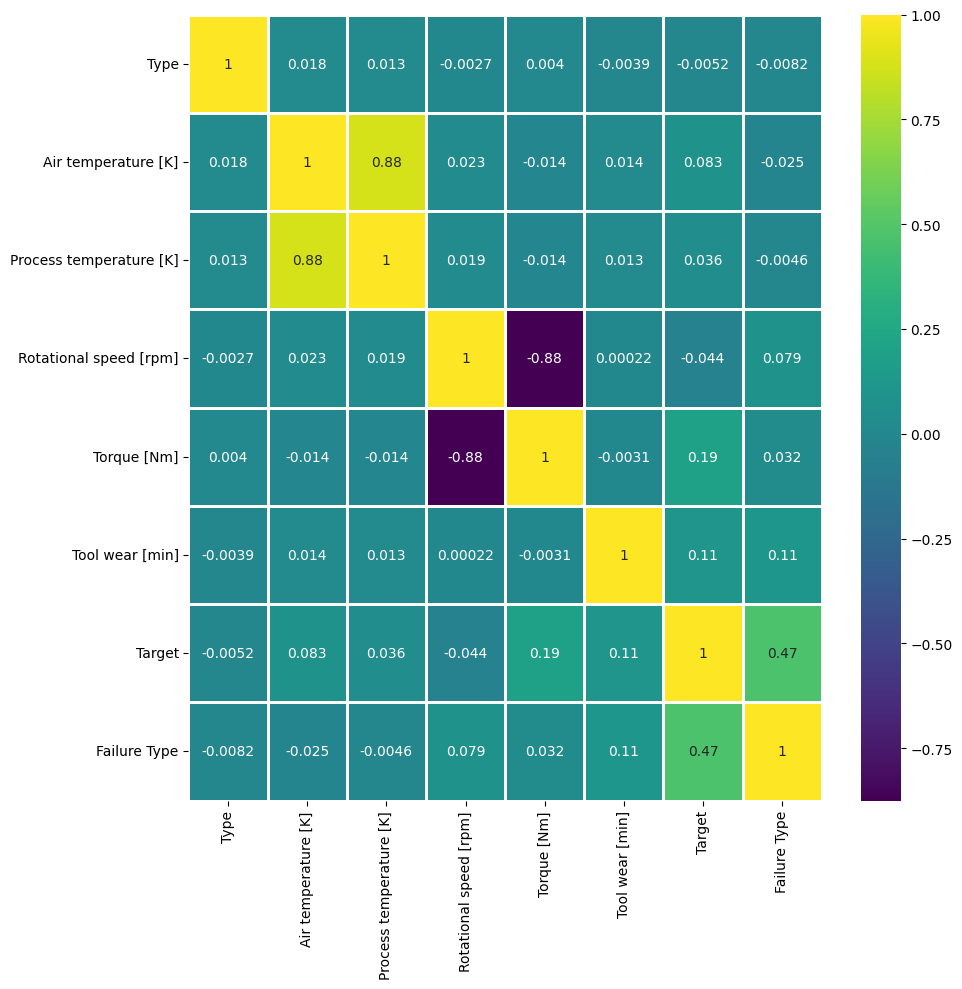

In [ ]:
corr = dataset.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True, linewidths=2, cmap='viridis')
plt.tight_layout()

In [ ]:
corr.sort_index(ascending=True)

Type  Air temperature [K]  \
Air temperature [K]      0.017599             1.000000   
Failure Type            -0.008249            -0.025327   
Process temperature [K]  0.013444             0.876107   
Rotational speed [rpm]  -0.002693             0.022670   
Target                  -0.005152             0.082556   
Tool wear [min]         -0.003930             0.013853   
Torque [Nm]              0.004011            -0.013778   
Type                     1.000000             0.017599   

                         Process temperature [K]  Rotational speed [rpm]  \
Air temperature [K]                     0.876107                0.022670   
Failure Type                           -0.004600                0.079407   
Process temperature [K]                 1.000000                0.019277   
Rotational speed [rpm]                  0.019277                1.000000   
Target                                  0.035946               -0.044188   
Tool wear [min]                         0.013488                0.000223   
Torque [Nm]                            -0.014061               -0.875027   
Type                                    0.013444               -0.002693   

                         Torque [Nm]  Tool wear [min]    Target  Failure Type  
Air temperature [K]        -0.013778         0.013853  0.082556     -0.025327  
Failure Type                0.031737         0.111619  0.470541      1.000000  
Process temperature [K]    -0.014061         0.013488  0.035946     -0.004600  
Rotational speed [rpm]     -0.875027         0.000223 -0.044188      0.079407  
Target                      0.191321         0.105448  1.000000      0.470541  
Tool wear [min]            -0.003093         1.000000  0.105448      0.111619  
Torque [Nm]                 1.000000        -0.003093  0.191321      0.031737  
Type                        0.004011        -0.003930 -0.005152     -0.008249

## Data Visualization

---



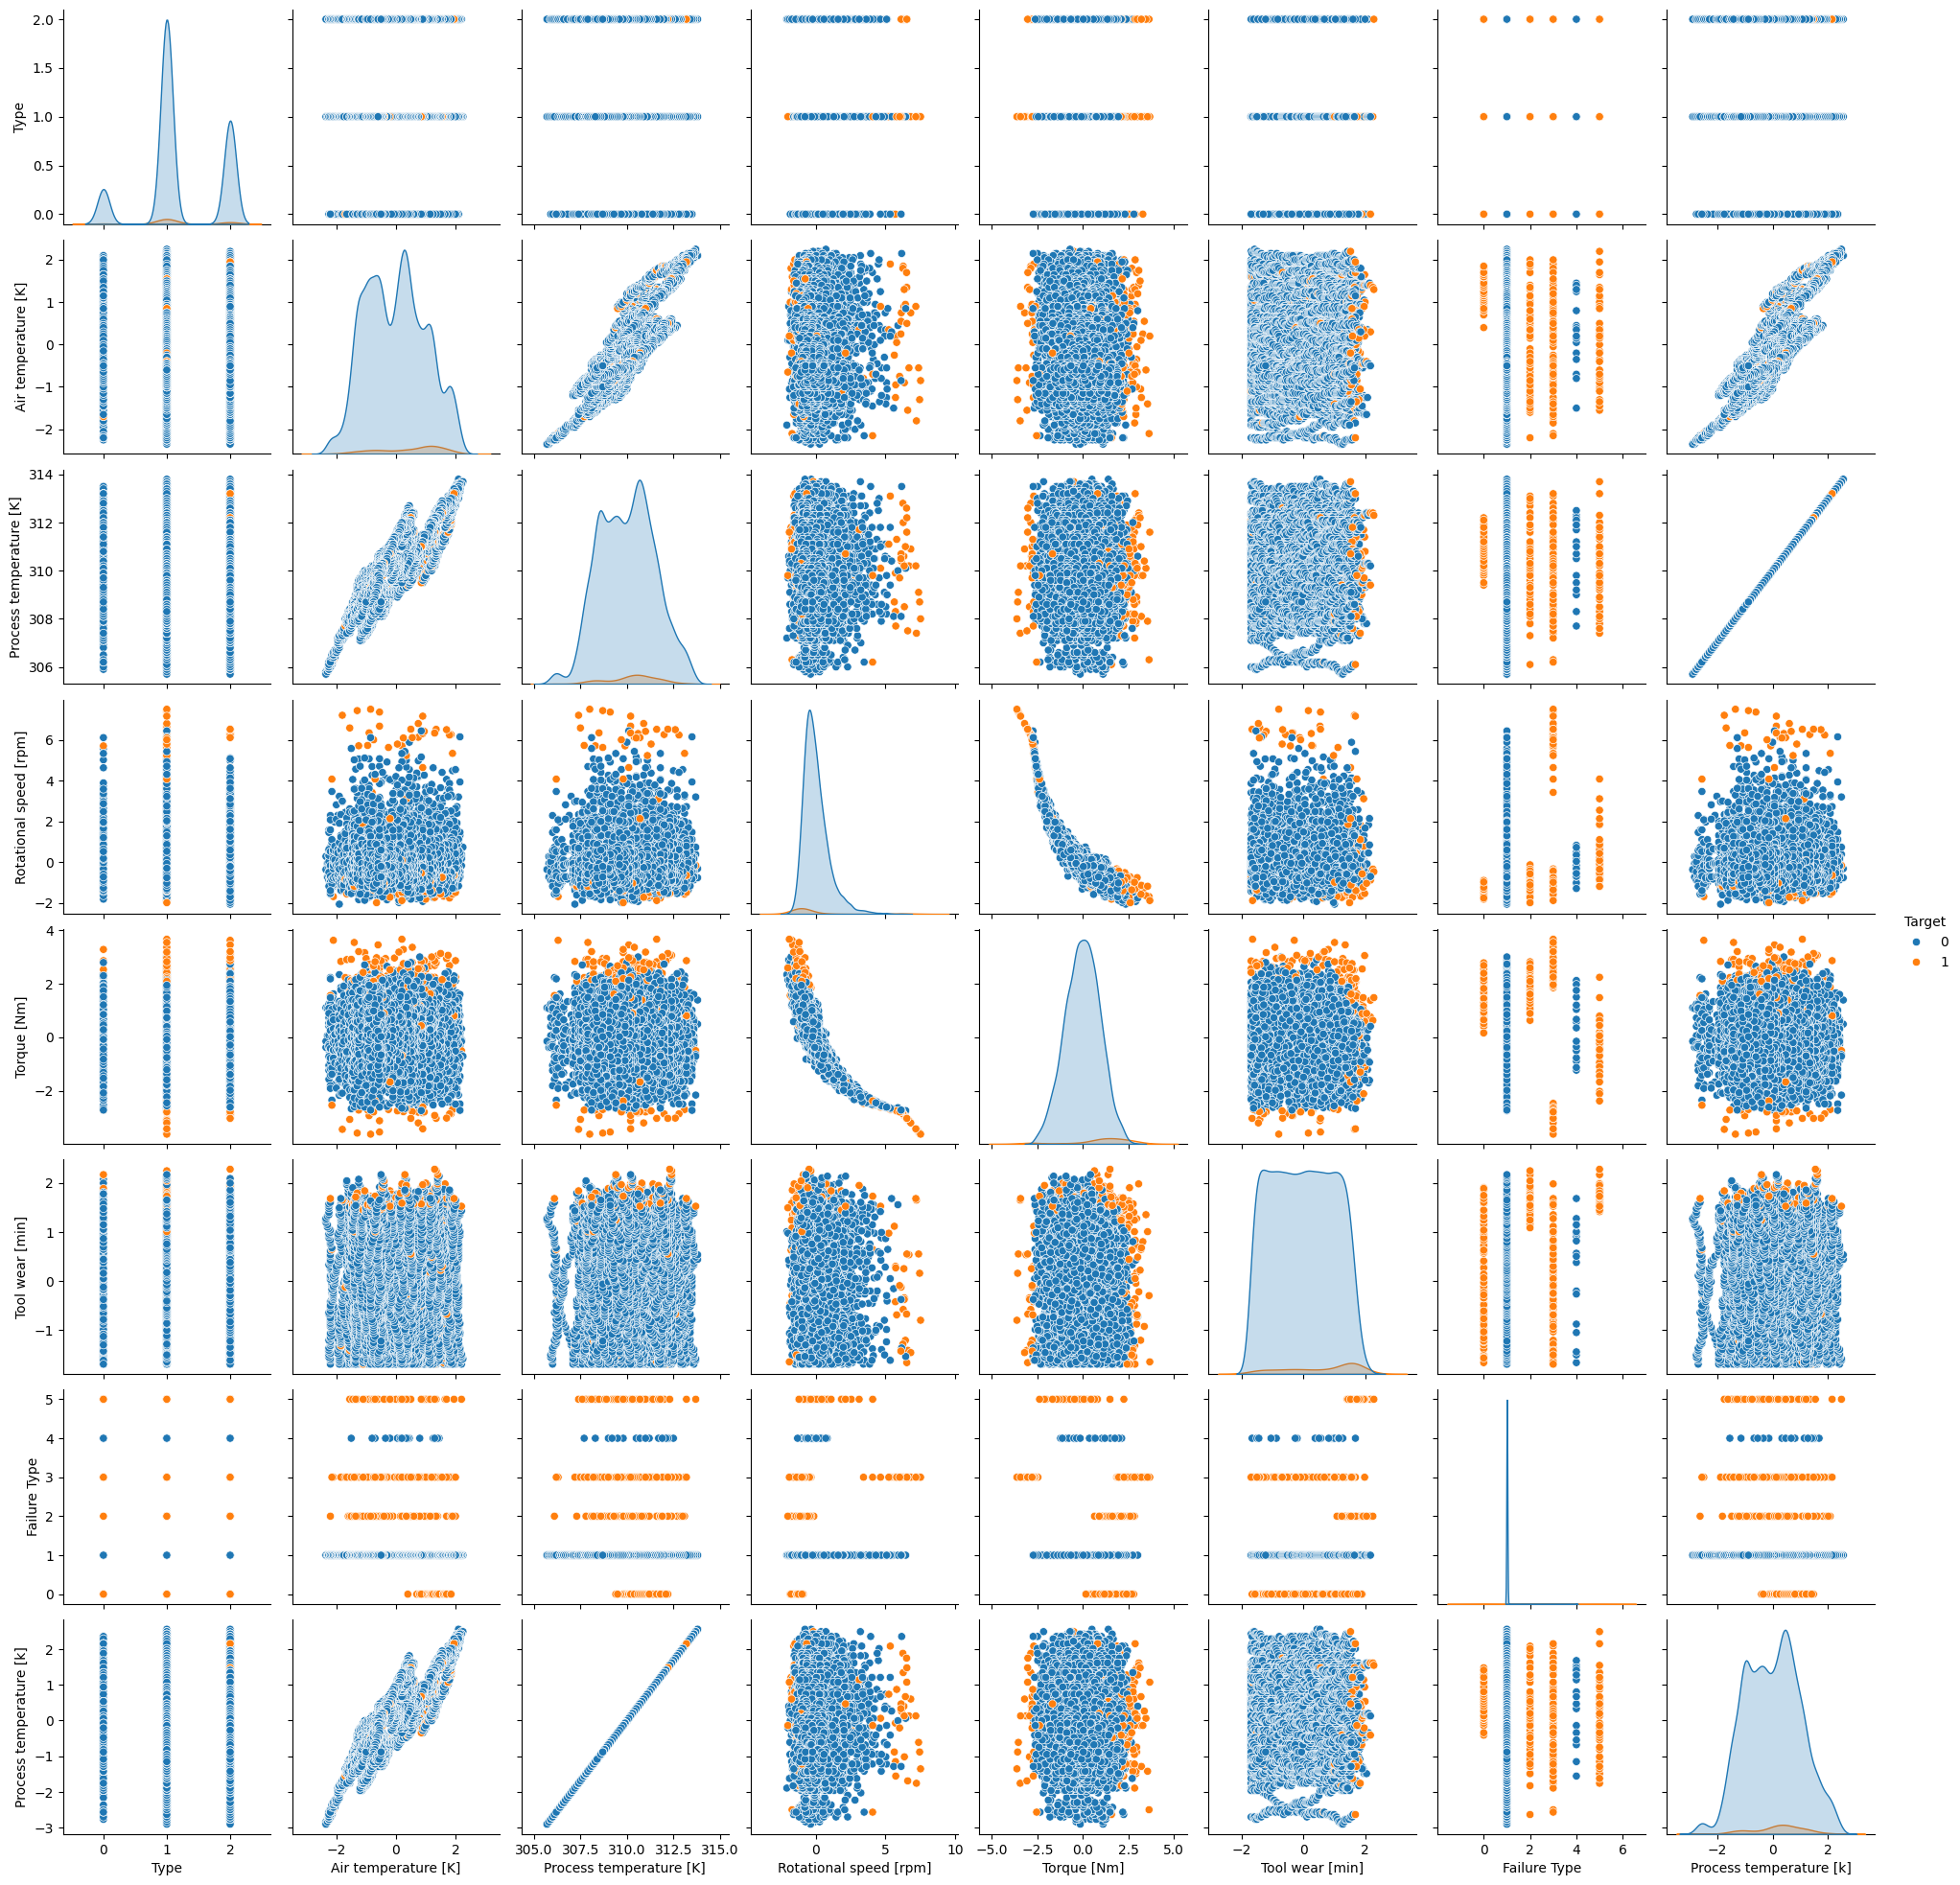

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(dataset, hue="Target", diag_kind="kde")
plt.show()

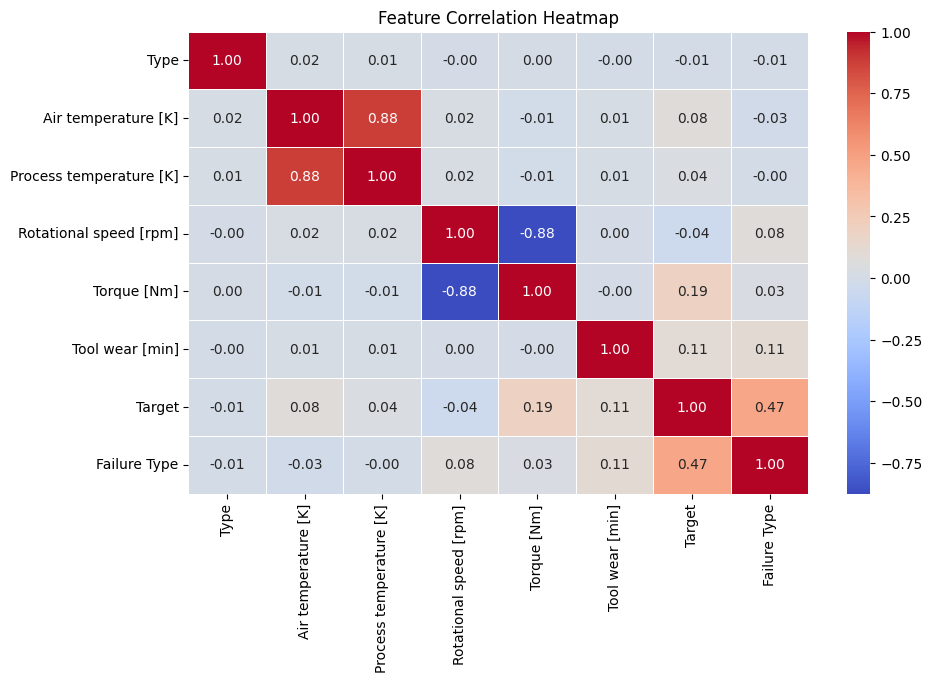

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()
plt.savefig('Feature_correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.close()

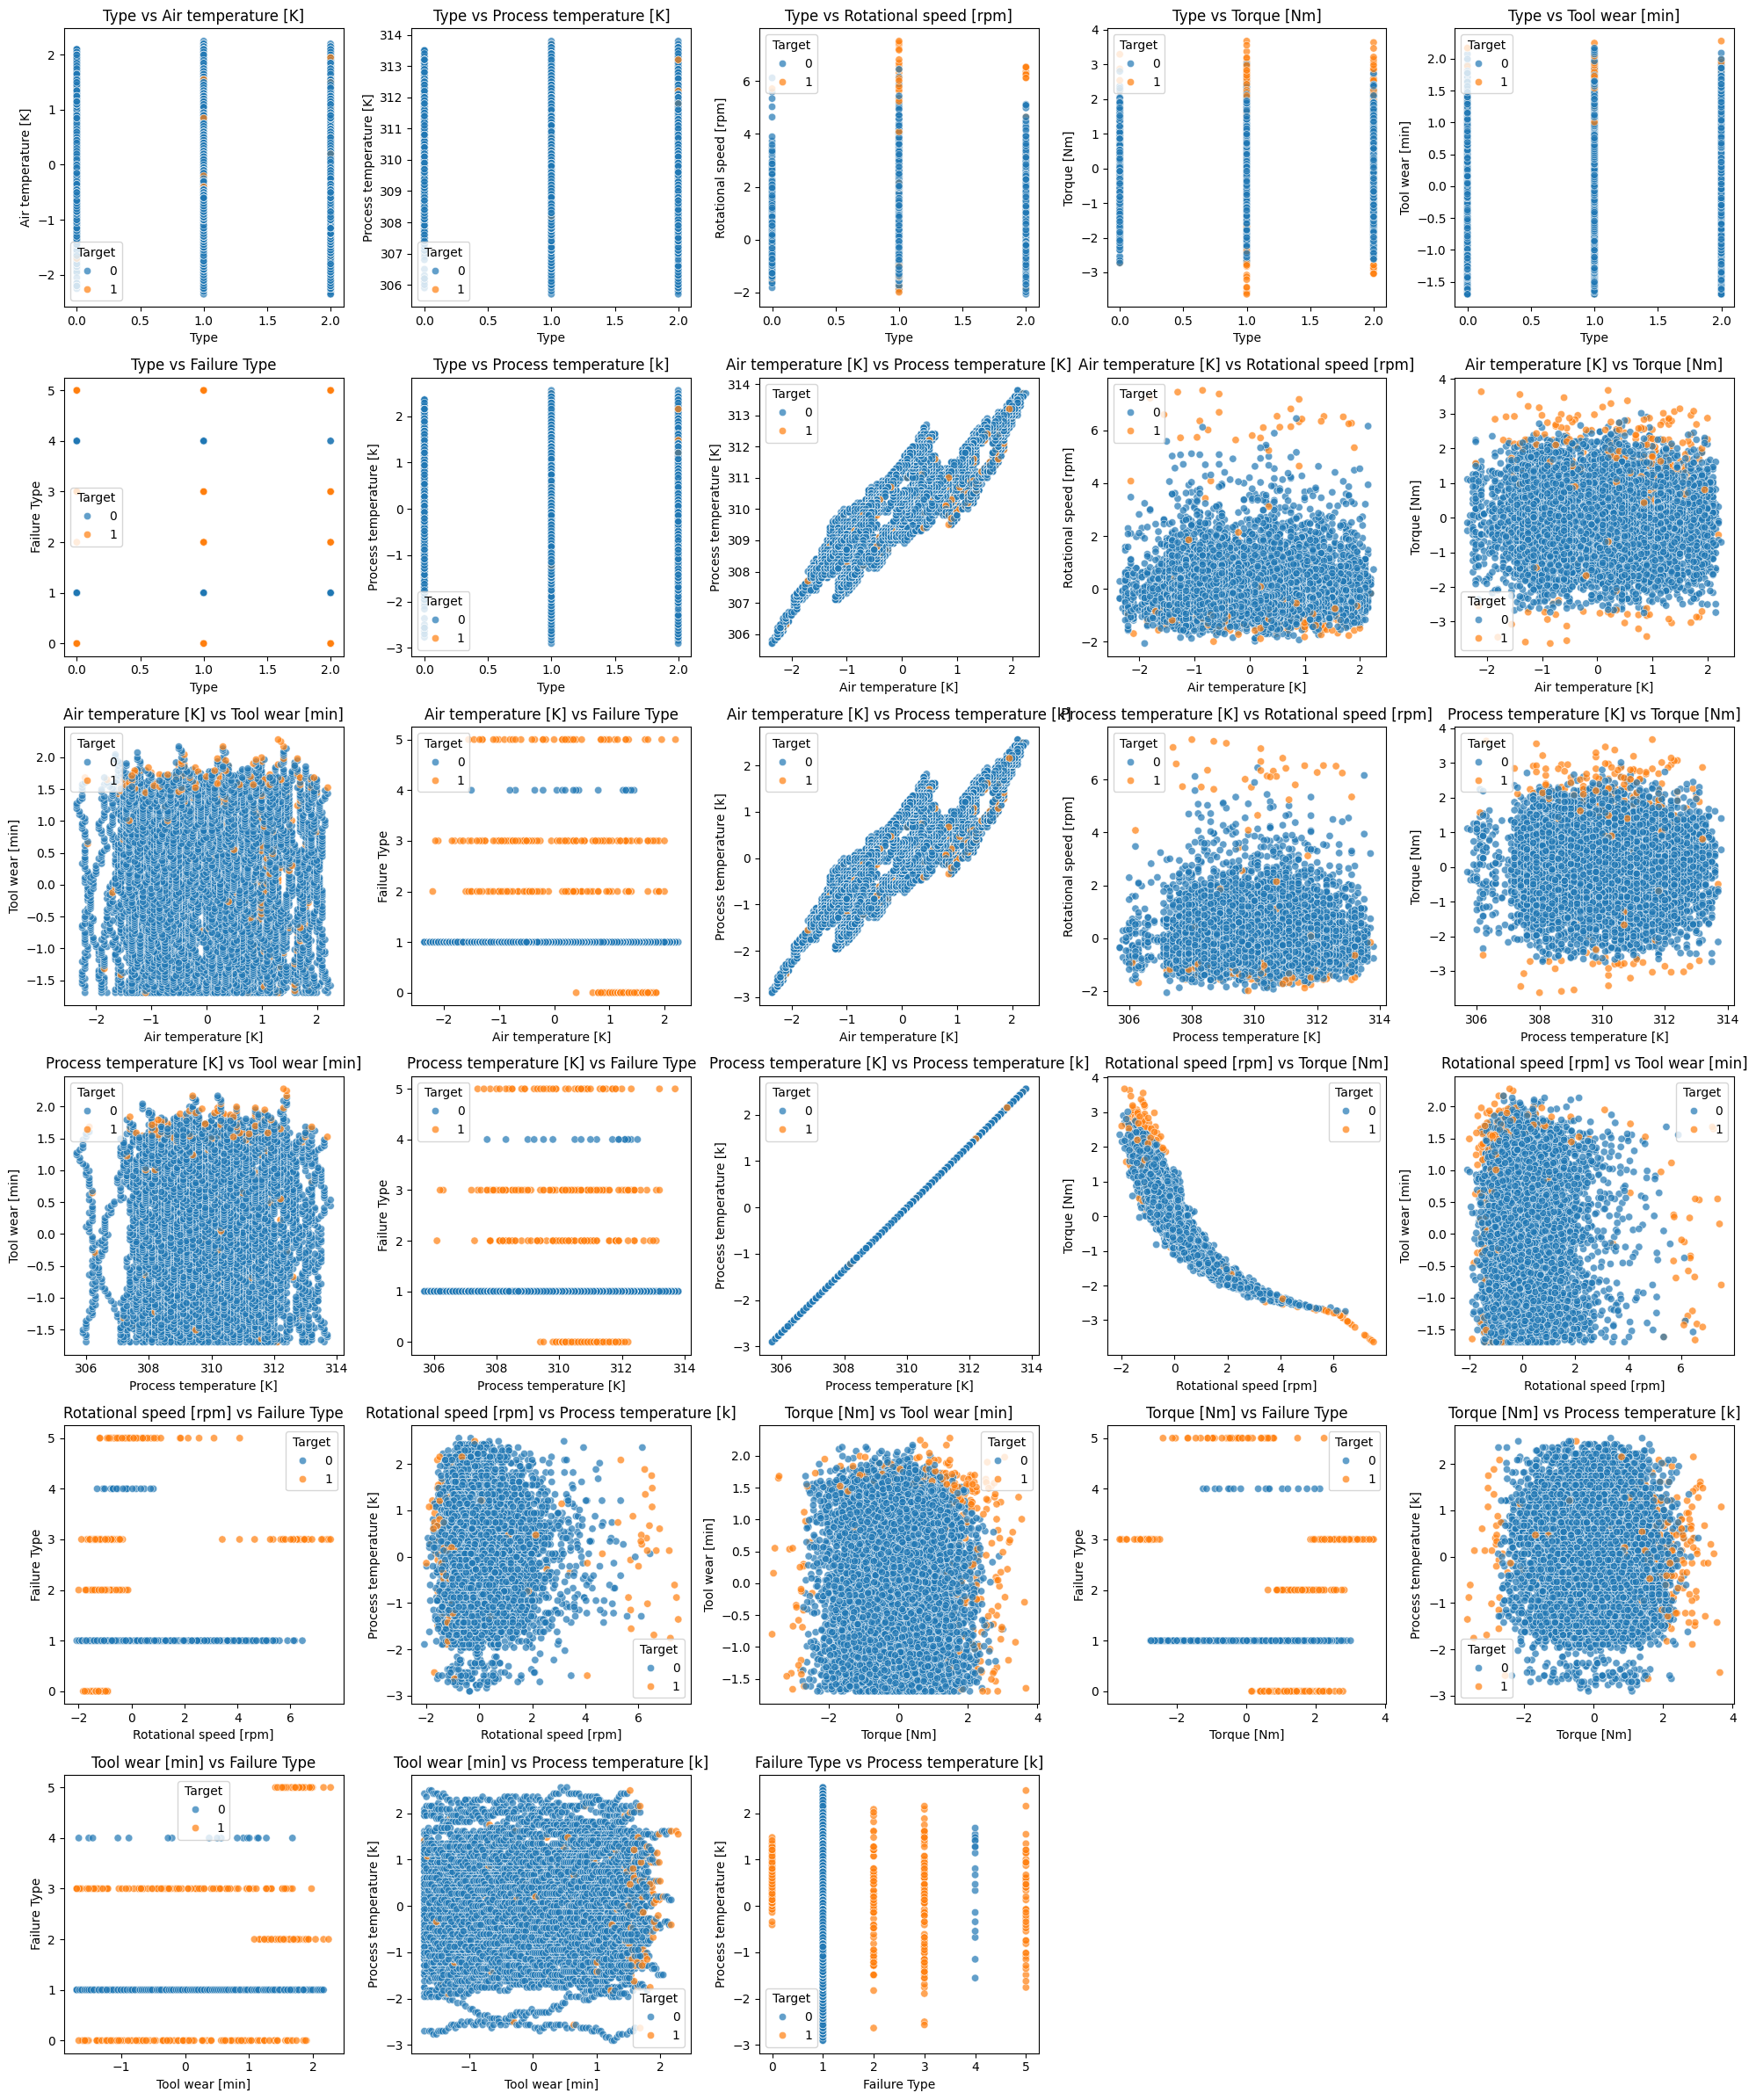

In [ ]:
import itertools

dataset['Target'] = dataset['Target'].astype(str)

# Select numerical columns
num_cols = dataset.select_dtypes(include=['float64', 'int64']).columns

# Calculate the number of combinations
n_combinations = len(list(itertools.combinations(num_cols, 2)))

# Dynamically determine grid size
n_rows = int(np.ceil(np.sqrt(n_combinations)))
n_cols = int(np.ceil(n_combinations / n_rows))

# Create figure
plt.figure(figsize=(n_cols * 4, n_rows * 4))

# Plot scatterplots
for i, (col1, col2) in enumerate(itertools.combinations(num_cols, 2), 1):
    plt.subplot(n_rows, n_cols, i)
    sns.scatterplot(data=dataset, x=col1, y=col2, hue="Target", alpha=0.7)
    plt.title(f"{col1} vs {col2}")

plt.tight_layout()
plt.show()


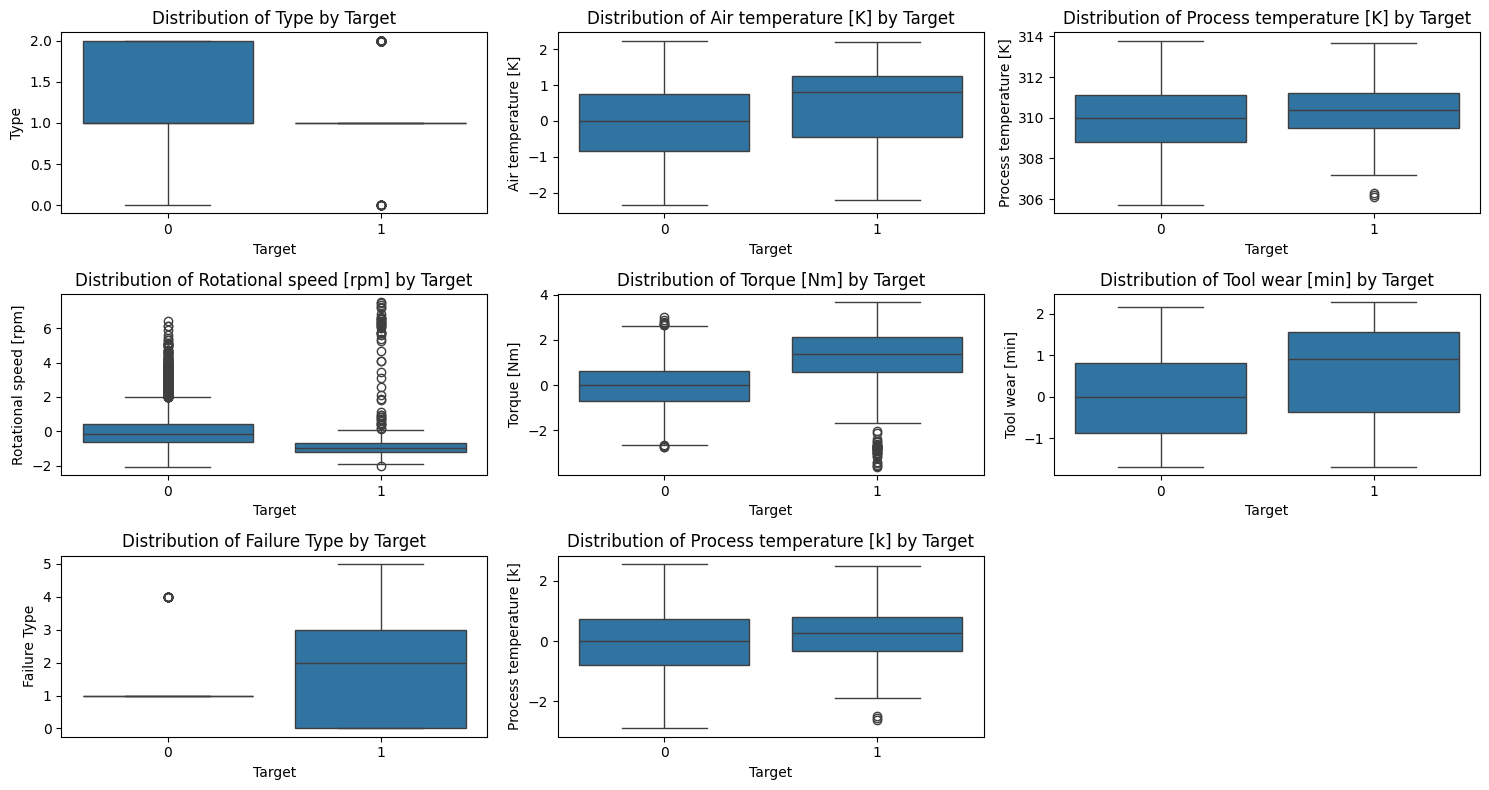

In [ ]:
dataset.columns = dataset.columns.str.strip()
dataset['Target']=dataset['Target'].astype(str)

plt.figure(figsize=(15,8))
for i, col in enumerate(dataset.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(3,3,i)
    sns.boxplot(data=dataset, x= "Target", y=col)
    plt.title(f"Distribution of {col} by Target")

plt.tight_layout()
plt.show()

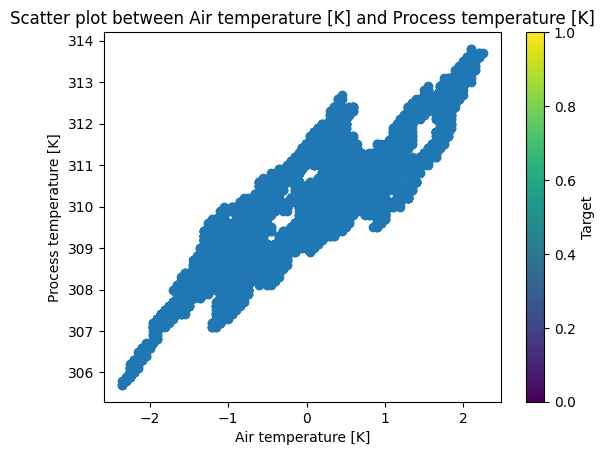

In [ ]:
plt.scatter(dataset['Air temperature [K]'], dataset['Process temperature [K]'])
plt.title('Scatter plot between Air temperature [K] and Process temperature [K]')
plt.xlabel('Air temperature [K]')
plt.ylabel('Process temperature [K]')
plt.colorbar(label='Target')
plt.show()

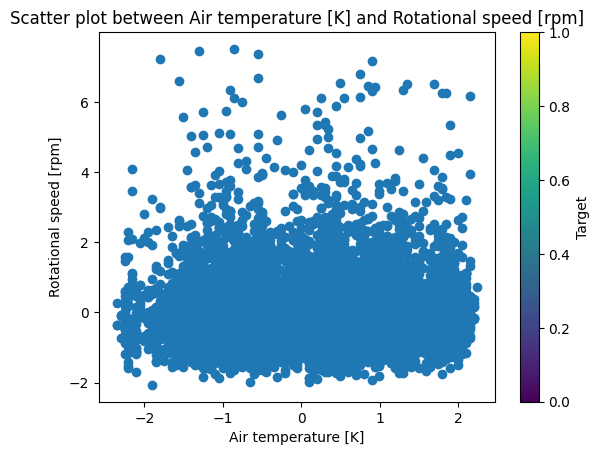

In [ ]:
plt.scatter(dataset['Air temperature [K]'], dataset['Rotational speed [rpm]'])
plt.title('Scatter plot between Air temperature [K] and Rotational speed [rpm]')
plt.xlabel('Air temperature [K]')
plt.ylabel('Rotational speed [rpm]')
plt.colorbar(label='Target')
plt.show()

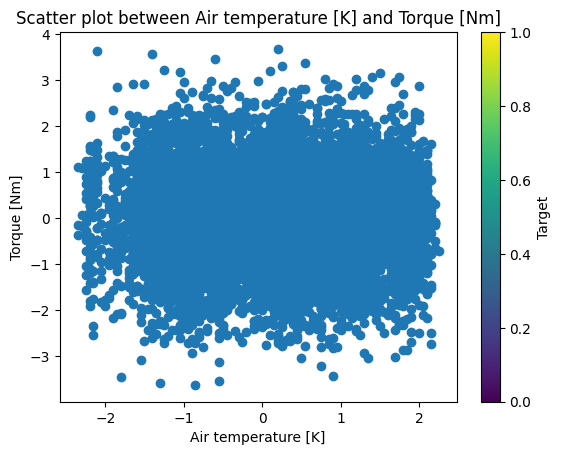

In [ ]:
plt.scatter(dataset['Air temperature [K]'], dataset['Torque [Nm]'])
plt.title('Scatter plot between Air temperature [K] and Torque [Nm]')
plt.xlabel('Air temperature [K]')
plt.ylabel('Torque [Nm]')
plt.colorbar(label='Target')
plt.show()

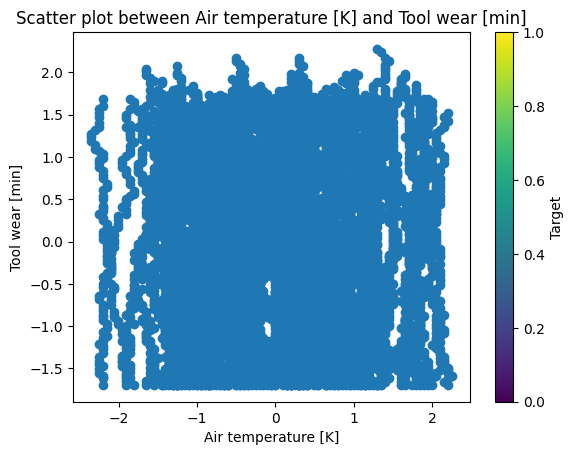

In [ ]:
plt.scatter(dataset['Air temperature [K]'], dataset['Tool wear [min]'])
plt.title('Scatter plot between Air temperature [K] and Tool wear [min]')
plt.xlabel('Air temperature [K]')
plt.ylabel('Tool wear [min]')
plt.colorbar(label='Target')
plt.show()

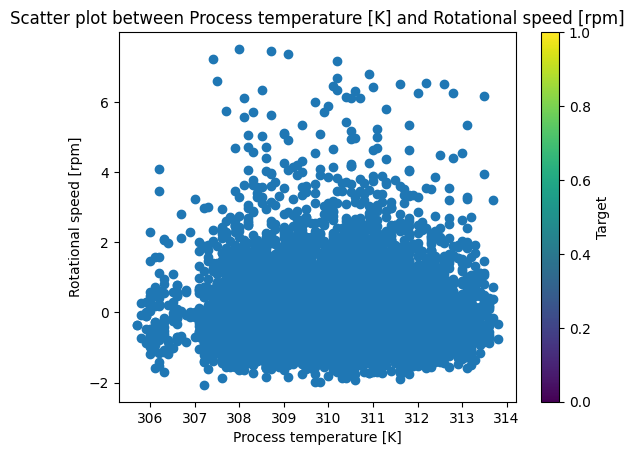

In [ ]:
plt.scatter(dataset['Process temperature [K]'], dataset['Rotational speed [rpm]'])
plt.title('Scatter plot between Process temperature [K] and Rotational speed [rpm]')
plt.xlabel('Process temperature [K]')
plt.ylabel('Rotational speed [rpm]')
plt.colorbar(label='Target')
plt.show()

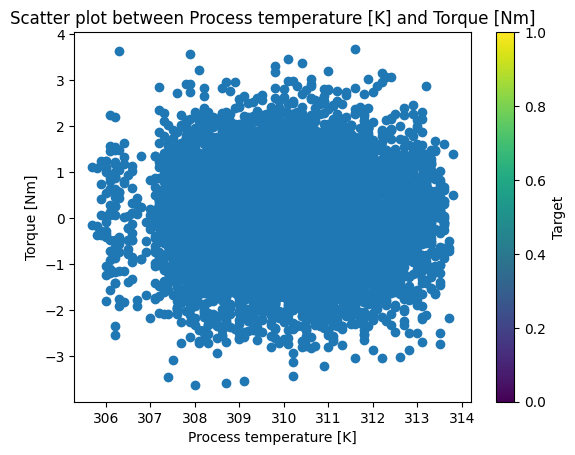

In [ ]:
plt.scatter(dataset['Process temperature [K]'], dataset['Torque [Nm]'])
plt.title('Scatter plot between Process temperature [K] and Torque [Nm]')
plt.xlabel('Process temperature [K]')
plt.ylabel('Torque [Nm]')
plt.colorbar(label='Target')
plt.show()

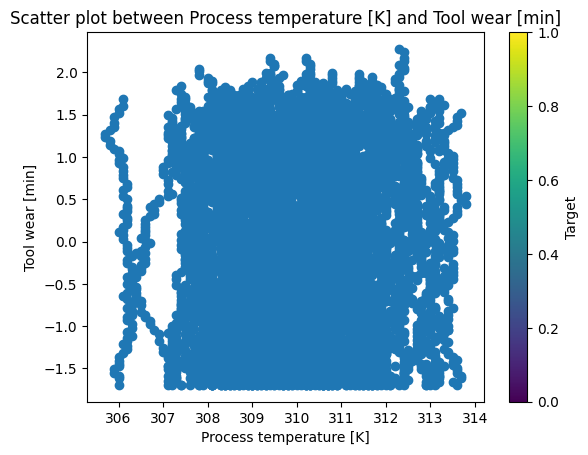

In [ ]:
plt.scatter(dataset['Process temperature [K]'], dataset['Tool wear [min]'])
plt.title('Scatter plot between Process temperature [K] and Tool wear [min]')
plt.xlabel('Process temperature [K]')
plt.ylabel('Tool wear [min]')
plt.colorbar(label='Target')
plt.show()

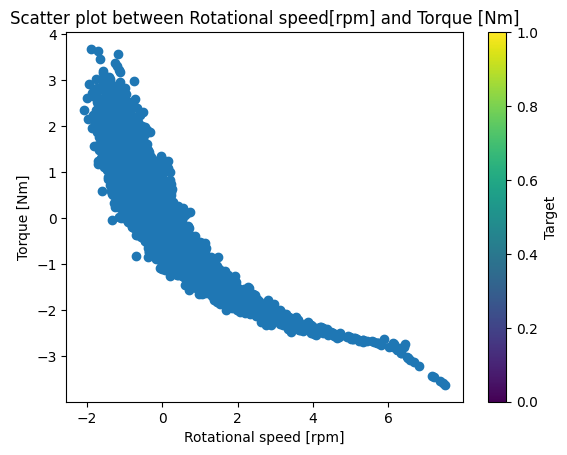

In [ ]:
plt.scatter(dataset['Rotational speed [rpm]'], dataset['Torque [Nm]'])
plt.title('Scatter plot between Rotational speed[rpm] and Torque [Nm]')
plt.xlabel('Rotational speed [rpm]')
plt.ylabel('Torque [Nm]')
plt.colorbar(label='Target')
plt.show()

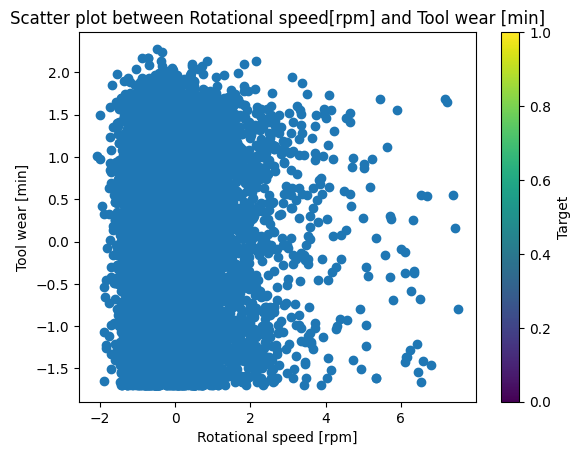

In [ ]:
plt.scatter(dataset['Rotational speed [rpm]'], dataset['Tool wear [min]'])
plt.title('Scatter plot between Rotational speed[rpm] and Tool wear [min]')
plt.xlabel('Rotational speed [rpm]')
plt.ylabel('Tool wear [min]')
plt.colorbar(label='Target')
plt.show()

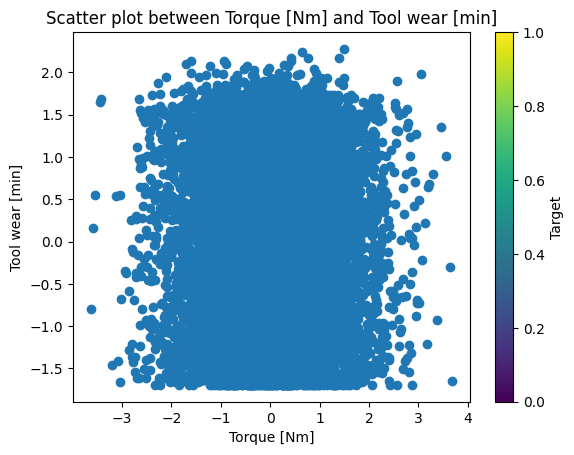

In [ ]:
plt.scatter(dataset['Torque [Nm]'], dataset['Tool wear [min]'])
plt.title('Scatter plot between Torque [Nm] and Tool wear [min]')
plt.xlabel('Torque [Nm]')
plt.ylabel('Tool wear [min]')
plt.colorbar(label='Target')
plt.show()

<Axes: xlabel='Target'>

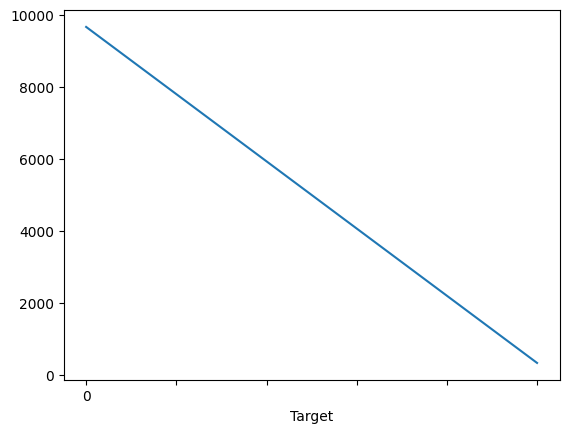

In [ ]:
dataset['Target'].value_counts().plot()

<ipython-input-30-00bfe1aaf141>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dataset['Target'], palette='bright')


<Axes: xlabel='Target', ylabel='count'>

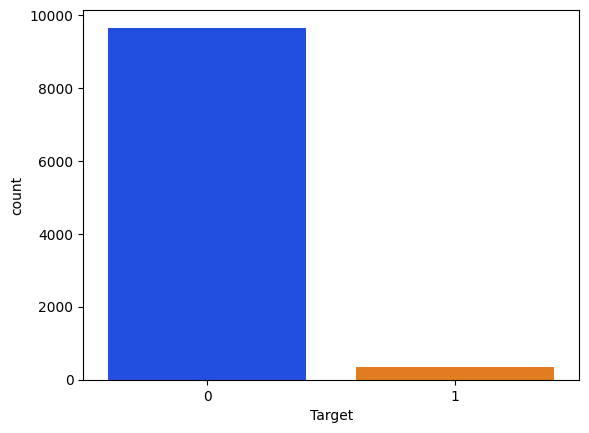

In [ ]:
sns.countplot(x=dataset['Target'], palette='bright')

## Feature Selection

---



In [ ]:
dataset.head()

Type  Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0     2            -0.952389                -0.947360                0.068185   
1     1            -0.902393                -0.879959               -0.729472   
2     1            -0.952389                -1.014761               -0.227450   
3     1            -0.902393                -0.947360               -0.590021   
4     1            -0.902393                -0.879959               -0.729472   

   Torque [Nm]  Tool wear [min]  Target  Failure Type  
0     0.282200        -1.695984       0             1  
1     0.633308        -1.648852       0             1  
2     0.944290        -1.617430       0             1  
3    -0.048845        -1.586009       0             1  
4     0.001313        -1.554588       0             1

In [ ]:
dataset.columns

Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target',
       'Failure Type'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
dataset['Failure Type'] = encoder.fit_transform(dataset['Failure Type'])

print(dataset['Failure Type'].value_counts())

Failure Type
1    9652
0     112
3      95
2      78
5      45
4      18
Name: count, dtype: int64


In [ ]:
numeric_df = dataset.select_dtypes(include=['float64', 'int64'])

In [ ]:
correlation_with_target = numeric_df.corr()['Failure Type'].sort_values(ascending=False)

In [ ]:
print(correlation_with_target)

Failure Type               1.000000
Target                     0.470541
Tool wear [min]            0.111619
Rotational speed [rpm]     0.079407
Torque [Nm]                0.031737
Process temperature [K]   -0.004600
Type                      -0.008249
Air temperature [K]       -0.025327
Name: Failure Type, dtype: float64


<ipython-input-29-988040246b81>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values, palette='viridis')


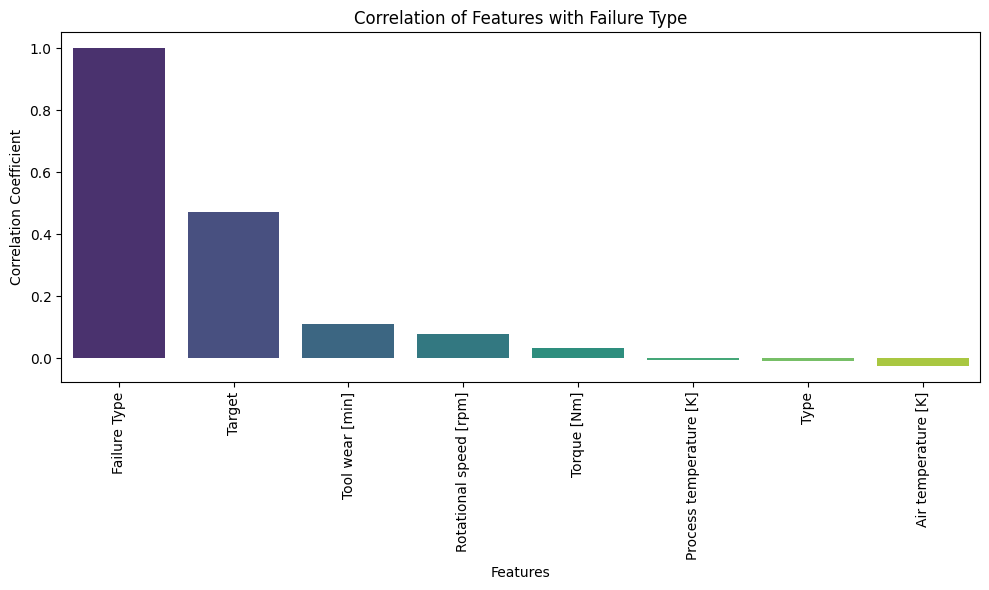

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values, palette='viridis')
plt.xticks(rotation=90)
plt.title(f"Correlation of Features with Failure Type")
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.tight_layout()
plt.show()
plt.savefig('Correlation_of_Features_with_Failure_Type.png', dpi=300, bbox_inches='tight')
plt.close()

In [ ]:
columns_to_drop = ['Target']

In [ ]:
dataset = dataset.drop(columns=columns_to_drop)

In [ ]:
dataset.head()

Type  Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0     2            -0.952389                -0.947360                0.068185   
1     1            -0.902393                -0.879959               -0.729472   
2     1            -0.952389                -1.014761               -0.227450   
3     1            -0.902393                -0.947360               -0.590021   
4     1            -0.902393                -0.879959               -0.729472   

   Torque [Nm]  Tool wear [min]  Failure Type  
0     0.282200        -1.695984             1  
1     0.633308        -1.648852             1  
2     0.944290        -1.617430             1  
3    -0.048845        -1.586009             1  
4     0.001313        -1.554588             1

In [ ]:
data = dataset
data.columns

Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Failure Type'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     10000 non-null  int64  
 1   Air temperature [K]      10000 non-null  float64
 2   Process temperature [K]  10000 non-null  float64
 3   Rotational speed [rpm]   10000 non-null  float64
 4   Torque [Nm]              10000 non-null  float64
 5   Tool wear [min]          10000 non-null  float64
 6   Failure Type             10000 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 547.0 KB


## Data Normalization

---



In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
X=data.drop('Failure Type', axis=1)
y=data['Failure Type']

In [ ]:
scaler=StandardScaler()

In [ ]:
X_scaled=scaler.fit_transform(X)

In [ ]:
X_scaled

array([[ 1.33388944, -0.95238944, -0.94735989,  0.06818514,  0.28219976,
        -1.69598374],
       [-0.33222278, -0.90239341, -0.879959  , -0.72947151,  0.63330802,
        -1.6488517 ],
       [-0.33222278, -0.95238944, -1.01476077, -0.22744984,  0.94428963,
        -1.61743034],
       ...,
       [ 1.33388944, -0.50242514, -0.94735989,  0.59251888, -0.66077672,
        -1.35034876],
       [-1.998335  , -0.50242514, -0.879959  , -0.72947151,  0.85400464,
        -1.30321671],
       [ 1.33388944, -0.50242514, -0.879959  , -0.2162938 ,  0.02137647,
        -1.22466331]])

In [ ]:
y

0       1
1       1
2       1
3       1
4       1
       ..
9995    1
9996    1
9997    1
9998    1
9999    1
Name: Failure Type, Length: 10000, dtype: int64

# Model Train "Failure Type" as a Target Column

## Train Test Split

---



In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
data['Failure Type'].value_counts()

Failure Type
1    9652
0     112
3      95
2      78
5      45
4      18
Name: count, dtype: int64

In [ ]:
print(pd.Series(y).value_counts())

Failure Type
1    9652
0     112
3      95
2      78
5      45
4      18
Name: count, dtype: int64


In [ ]:
# Plot class distribution before SMOTE
plt.figure(figsize=(10, 5))
sns.countplot(x=pd.Series(y), hue=pd.Series(y), palette='bright', legend=False)
plt.title('Class Distribution Before Using SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')
plt.savefig('class_distribution_before_smote.png', dpi=300, bbox_inches='tight')
plt.close()

Text(0, 0.5, 'Count')

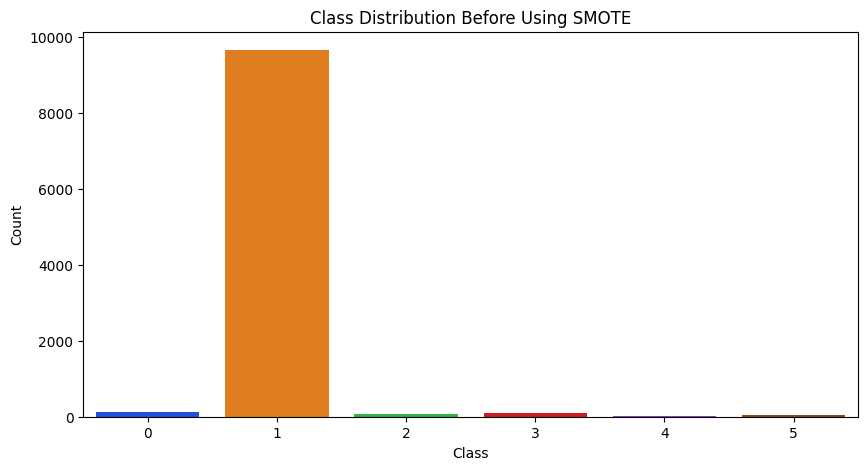

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x=pd.Series(y), hue=pd.Series(y), palette='bright', legend=False)
plt.title('Class Distribution Before Using SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')

In [ ]:
print("Original X shape:", X_scaled.shape)
print("Original y shape:", y.shape)

Original X shape: (10000, 6)
Original y shape: (10000,)


In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
# Apply SMOTE to training set
smote = SMOTE(sampling_strategy={0: 9652, 1: 9652 , 2: 9652, 3: 9652, 4: 9652 , 5: 9652}, random_state=42)  # Match class 0's count in training set
X_smote, y_smote = smote.fit_resample(X_scaled, y)

In [ ]:
print(pd.Series(y_smote).value_counts())

Failure Type
1    9652
3    9652
5    9652
2    9652
4    9652
0    9652
Name: count, dtype: int64


In [ ]:
# Verify shapes after SMOTE
print("X_smote shape:", X_smote.shape)
print("y_smote shape:", y_smote.shape)

X_smote shape: (57912, 6)
y_smote shape: (57912,)


In [ ]:
print("Class distribution in y_smote:", np.bincount(y_smote))

Class distribution in y_smote: [9652 9652 9652 9652 9652 9652]


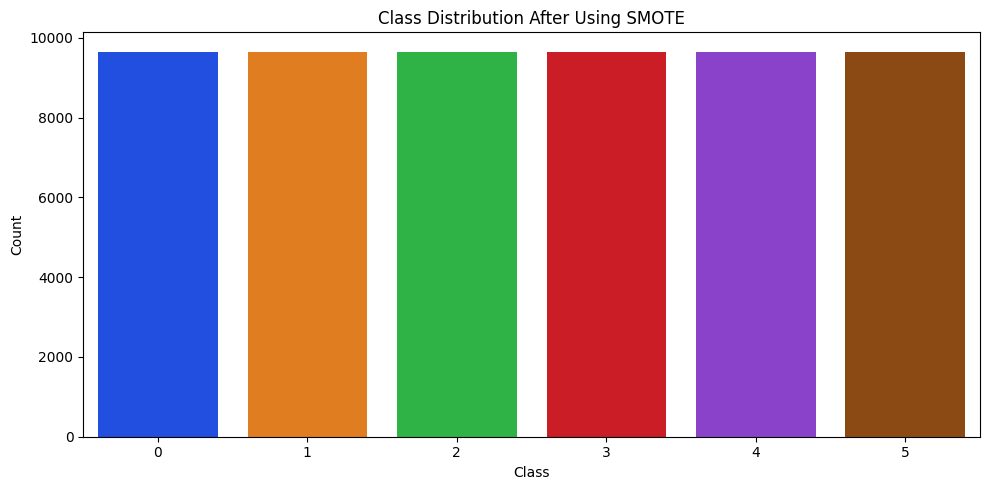

In [ ]:
# Plot class distribution after SMOTE
plt.figure(figsize=(10, 5))
sns.countplot(x=pd.Series(y_smote), hue=pd.Series(y_smote), palette='bright', legend=False)
plt.title('Class Distribution After Using SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')
plt.savefig('class_distribution_after_smote.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.3, random_state=42, stratify=y_smote)

# Model Evaluation

---





In [ ]:
!pip install --upgrade scikit-learn

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import learning_curve
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score

def evaluate_multiclass(y_true, y_pred, y_proba):
    report = classification_report(y_true, y_pred, output_dict=True)

    metrics = {
        "Accuracy": report['accuracy'],
        "Precision (Macro)": report['macro avg']['precision'],
        "Recall (Macro)": report['macro avg']['recall'],
        "F1 Score (Macro)": report['macro avg']['f1-score'],
        "ROC AUC Score (Macro)": roc_auc_score(y_true, y_proba, multi_class="ovr")  # One-vs-Rest
    }
    return metrics

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [ ]:
forest_model = RandomForestClassifier(random_state=42)

In [ ]:
forest_model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [ ]:
forest_pred = forest_model.predict(X_test)

In [ ]:
print(classification_report(y_test, forest_pred, zero_division=0))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2895
           1       1.00      0.97      0.98      2895
           2       1.00      1.00      1.00      2896
           3       0.99      1.00      1.00      2896
           4       0.99      1.00      1.00      2896
           5       0.99      1.00      0.99      2896

    accuracy                           0.99     17374
   macro avg       0.99      0.99      0.99     17374
weighted avg       0.99      0.99      0.99     17374



In [ ]:
cm = confusion_matrix(y_test, forest_pred)

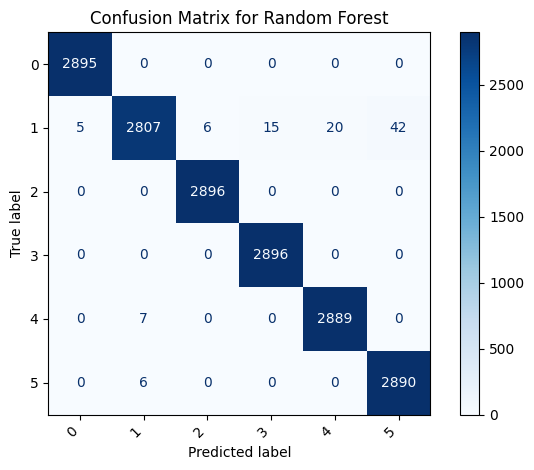

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for Random Forest')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('confusion_matrix_rf_levels.png')
plt.show()

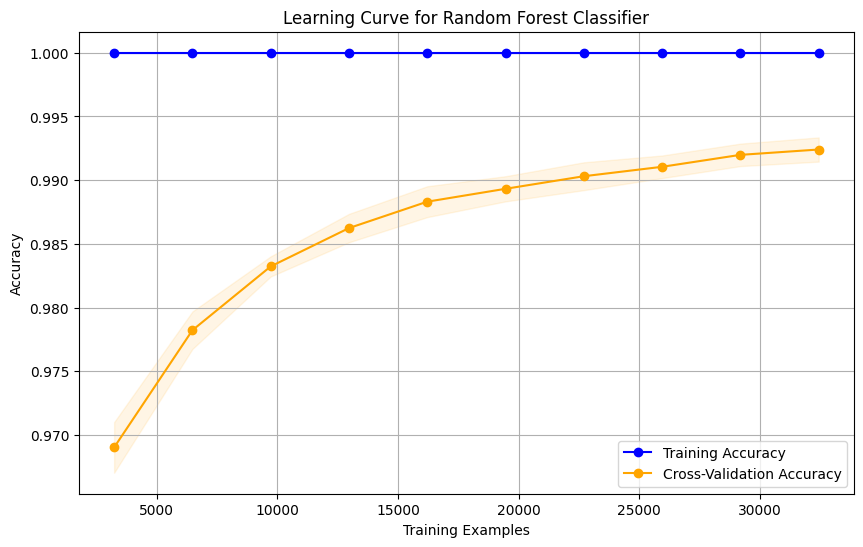

In [ ]:
train_sizes = np.linspace(0.1, 1.0, 10)

train_sizes, train_scores, val_scores = learning_curve(
    forest_model, X_train, y_train, train_sizes=train_sizes, cv=5, scoring='accuracy', random_state=42
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)


plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Accuracy', color='blue', marker='o')
plt.plot(train_sizes, val_mean, label='Cross-Validation Accuracy', color='orange', marker='o')


plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.1)
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color='orange', alpha=0.1)


plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.title('Learning Curve for Random Forest Classifier')
plt.legend(loc='best')
plt.grid(True)
plt.savefig('learning_curve_rf.png')
plt.show()

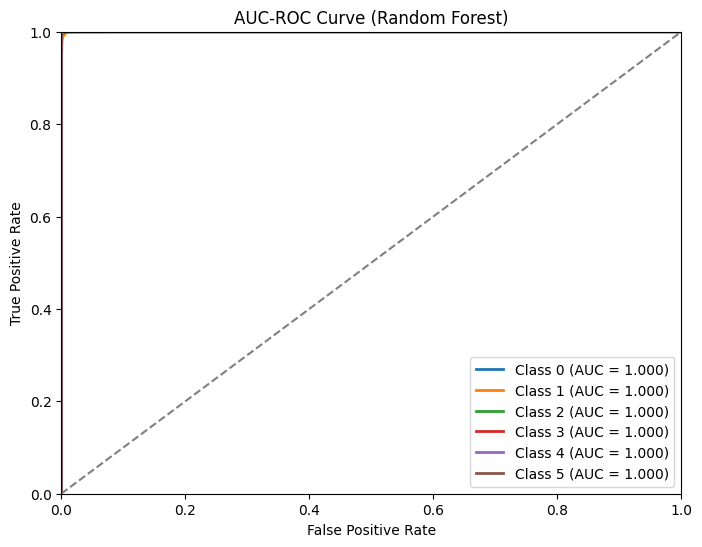

In [ ]:
y_probs = forest_model.predict_proba(X_test)
num_classes = len(set(y_test))
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))


plt.figure(figsize=(8, 6))
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_probs[:, i])
    RF_roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {RF_roc_auc:.3f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve (Random Forest)')
plt.legend(loc='lower right')
plt.savefig('AUC-ROC Curve (Random Forest)')
plt.show()

In [ ]:
RF_accuracy = accuracy_score(y_test, forest_pred)

In [ ]:
RF_precision = precision_score(y_test, forest_pred, average='macro', zero_division=0)
RF_recall = recall_score(y_test, forest_pred, average='macro', zero_division=0)
RF_f1 = f1_score(y_test, forest_pred, average='macro', zero_division=0)

In [ ]:
print("Accuracy:  {:.3f}".format(RF_accuracy))
print("Precision: {:.3f}".format(RF_precision))
print("Recall:    {:.3f}".format(RF_recall))
print("F1 score:  {:.3f}".format(RF_f1))
print("ROC Score: {:.3f}".format(RF_roc_auc))

Accuracy:  0.994
Precision: 0.994
Recall:    0.994
F1 score:  0.994
ROC Score: 1.000


**AdaBoost**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.utils.class_weight import compute_class_weight
from sklearn.multiclass import OneVsRestClassifier

In [ ]:
model = AdaBoostClassifier(n_estimators=10, learning_rate=1)

In [ ]:
model.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=1, n_estimators=10)

In [ ]:
y_pred_adaboost = model.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred_adaboost,zero_division=0))

              precision    recall  f1-score   support

           0       0.50      0.00      0.00      2895
           1       0.26      0.06      0.09      2895
           2       0.42      0.92      0.58      2896
           3       0.72      0.54      0.62      2896
           4       0.31      0.90      0.46      2896
           5       0.00      0.00      0.00      2896

    accuracy                           0.40     17374
   macro avg       0.37      0.40      0.29     17374
weighted avg       0.37      0.40      0.29     17374



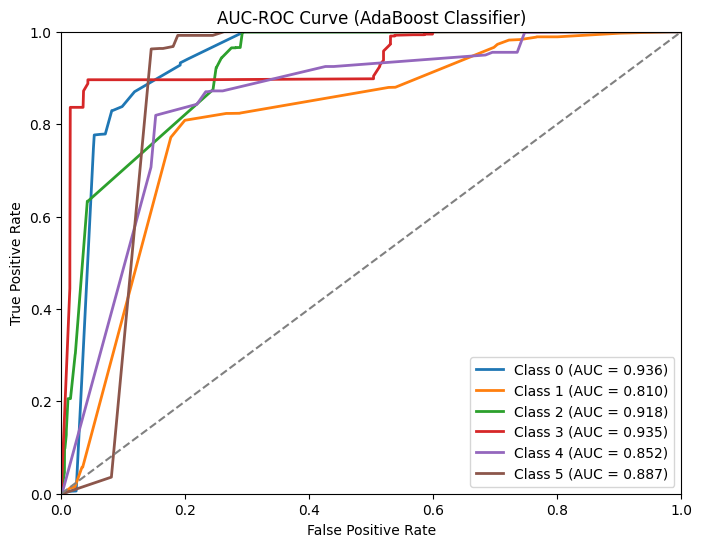

In [ ]:
y_test_bin = label_binarize(y_test, classes=np.unique(y))
num_classes = y_test_bin.shape[1]

y_probs = model.predict_proba(X_test)

plt.figure(figsize=(8,6))
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_probs[:, i])
    AdaBoost_roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {AdaBoost_roc_auc:.3f})')

plt.plot([0,1], [0,1], color='gray', linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve (AdaBoost Classifier)')
plt.legend(loc='lower right')
plt.savefig('AUC-ROC Curve Adaboost Classifier')
plt.show()

In [ ]:
metrics = evaluate_multiclass(y_test, y_pred_adaboost, y_probs)
print(metrics)

{'Accuracy': 0.4024979854955681, 'Precision (Macro)': 0.3694605790287602, 'Recall (Macro)': 0.40245499718508765, 'F1 Score (Macro)': 0.29327262200035453, 'ROC AUC Score (Macro)': np.float64(0.889549801660941)}


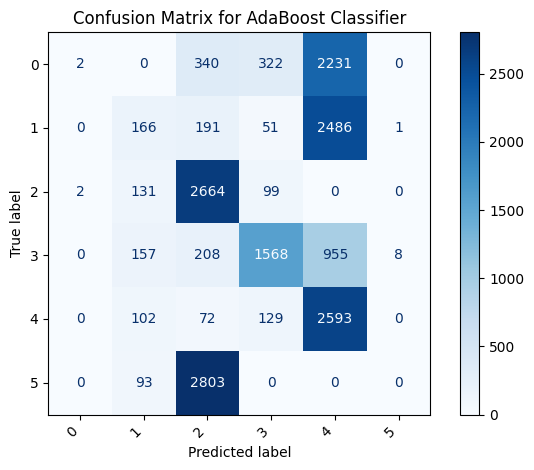

In [ ]:
cm = confusion_matrix(y_test, y_pred_adaboost)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for AdaBoost Classifier')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('confusion_matrix_adaboost.png')
plt.show()

In [ ]:
AdaBoost_accuracy = accuracy_score(y_test, y_pred_adaboost)
AdaBoost_precision = precision_score(y_test, y_pred_adaboost, average='macro', zero_division=0)
AdaBoost_recall = recall_score(y_test, y_pred_adaboost, average='macro', zero_division=0)
AdaBoost_f1 = f1_score(y_test, y_pred_adaboost, average='macro', zero_division=0)

In [ ]:
print("Accuracy:  {:.3f}".format(AdaBoost_accuracy))
print("Precision: {:.3f}".format(AdaBoost_precision))
print("Recall:    {:.3f}".format(AdaBoost_recall))
print("F1 score:  {:.3f}".format(AdaBoost_f1))
print("ROC Score: {:.3f}".format(AdaBoost_roc_auc))

Accuracy:  0.402
Precision: 0.369
Recall:    0.402
F1 score:  0.293
ROC Score: 0.887


Hyperparameter Tuning

In [ ]:
param_grid = {
    'n_estimators': [50,100,200,500],
    'learning_rate': [0.01,0.1,0.5,1],
    'estimator': [DecisionTreeClassifier(max_depth=1),
                  DecisionTreeClassifier(max_depth=3)]
}

In [ ]:
ada_model = AdaBoostClassifier(random_state=42)

In [ ]:
random_search = RandomizedSearchCV(
    estimator=ada_model,param_distributions=param_grid,
    n_iter=10,cv=5,scoring='f1_weighted', random_state=42, n_jobs=-1
)

In [ ]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'estimator': [DecisionTreeClassifier(max_depth=1),
                                                      DecisionTreeClassifier(max_depth=3)],
                                        'learning_rate': [0.01, 0.1, 0.5, 1],
                                        'n_estimators': [50, 100, 200, 500]},
                   random_state=42, scoring='f1_weighted')

In [ ]:
best_params = random_search.best_params_
print("Best Hyperparameters :", best_params)

Best Hyperparameters : {'n_estimators': 100, 'learning_rate': 0.5, 'estimator': DecisionTreeClassifier(max_depth=3)}


In [ ]:
model_best = AdaBoostClassifier(**best_params,random_state=42)
model_best.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.5, n_estimators=100, random_state=42)

In [ ]:
y_HY_pred_adaboost = model_best.predict(X_test)

In [ ]:
print(classification_report(y_test,y_HY_pred_adaboost, zero_division=0))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2895
           1       0.64      0.71      0.67      2895
           2       0.96      1.00      0.98      2896
           3       1.00      0.99      0.99      2896
           4       0.74      0.65      0.69      2896
           5       0.95      0.95      0.95      2896

    accuracy                           0.88     17374
   macro avg       0.88      0.88      0.88     17374
weighted avg       0.88      0.88      0.88     17374



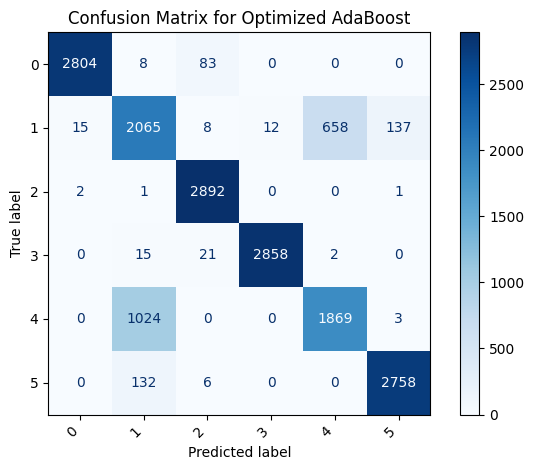

In [ ]:
cm = confusion_matrix(y_test, y_pred_adaboost)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for Optimized AdaBoost')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('confusion_matrix_adaboost_optimized.png')
plt.show()

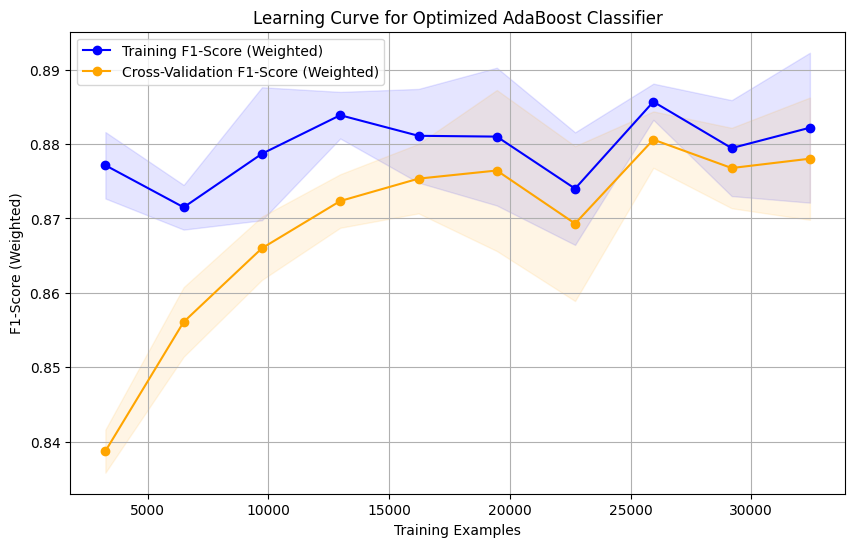

In [ ]:
train_sizes = np.linspace(0.1, 1.0, 10)

train_sizes, train_scores, val_scores = learning_curve(
    model_best,
    X_train,
    y_train,
    train_sizes=train_sizes,
    cv=5,
    scoring='f1_weighted',
    random_state=42,
    n_jobs=-1
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training F1-Score (Weighted)', color='blue', marker='o')
plt.plot(train_sizes, val_mean, label='Cross-Validation F1-Score (Weighted)', color='orange', marker='o')

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.1)
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color='orange', alpha=0.1)

plt.xlabel('Training Examples')
plt.ylabel('F1-Score (Weighted)')
plt.title('Learning Curve for Optimized AdaBoost Classifier')
plt.legend(loc='best')
plt.grid(True)
plt.savefig('learning_curve_adaboost_optimized.png')
plt.show()

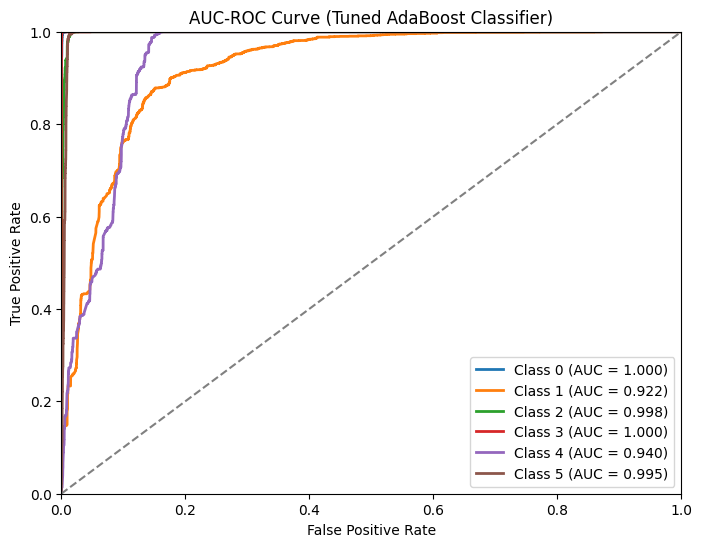

In [ ]:
y_test_bin = label_binarize(y_test, classes=np.unique(y))
num_classes = y_test_bin.shape[1]

y_probs =model_best.predict_proba(X_test)

plt.figure(figsize=(8,6))
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_probs[:, i])
    AdaBoost_HY_roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {AdaBoost_HY_roc_auc:.3f})')

plt.plot([0,1], [0,1], color='gray', linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve (Tuned AdaBoost Classifier)')
plt.legend(loc='lower right')
plt.savefig('AUC-ROC Curve (Tuned AdaBoost Classifier)')
plt.show()

In [ ]:
AdaBoost_HY_accuracy = accuracy_score(y_test, y_HY_pred_adaboost)
AdaBoost_HY_precision = precision_score(y_test, y_HY_pred_adaboost, average='macro', zero_division=0)
AdaBoost_HY_recall = recall_score(y_test, y_HY_pred_adaboost, average='macro', zero_division=0)
AdaBoost_HY_f1 = f1_score(y_test, y_HY_pred_adaboost, average='macro', zero_division=0)

In [ ]:
print("Accuracy:  {:.3f}".format(AdaBoost_HY_accuracy))
print("Precision: {:.3f}".format(AdaBoost_HY_precision))
print("Recall:    {:.3f}".format(AdaBoost_HY_recall))
print("F1 score:  {:.3f}".format(AdaBoost_HY_f1))
print("ROC Score: {:.3f}".format(AdaBoost_HY_roc_auc))

Accuracy:  0.878
Precision: 0.880
Recall:    0.878
F1 score:  0.878
ROC Score: 0.995


### **SVC**

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC(probability=True, kernel='linear')

In [ ]:
svc.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

In [ ]:
y_pred_svc = svc.predict(X_test)

In [ ]:
print("Accuracy: ", accuracy_score(y_test,y_pred_svc))

Accuracy:  0.8979509612064004


In [ ]:
print(classification_report(y_test, y_pred_svc, zero_division=0))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      2895
           1       0.80      0.62      0.70      2895
           2       0.95      1.00      0.97      2896
           3       0.99      0.99      0.99      2896
           4       0.75      0.83      0.79      2896
           5       0.92      0.94      0.93      2896

    accuracy                           0.90     17374
   macro avg       0.90      0.90      0.89     17374
weighted avg       0.90      0.90      0.89     17374



In [ ]:
metrics = evaluate_multiclass(y_test, y_pred_svc, y_probs)
print(metrics)

{'Accuracy': 0.8979509612064004, 'Precision (Macro)': 0.8959462360164591, 'Recall (Macro)': 0.897940899563291, 'F1 Score (Macro)': 0.8946360663035079, 'ROC AUC Score (Macro)': np.float64(0.9758518608786111)}


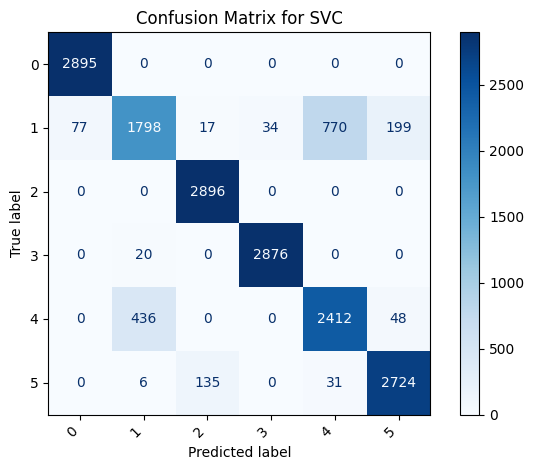

In [ ]:
cm = confusion_matrix(y_test, y_pred_svc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for SVC')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('confusion_matrix_svc.png')
plt.show()

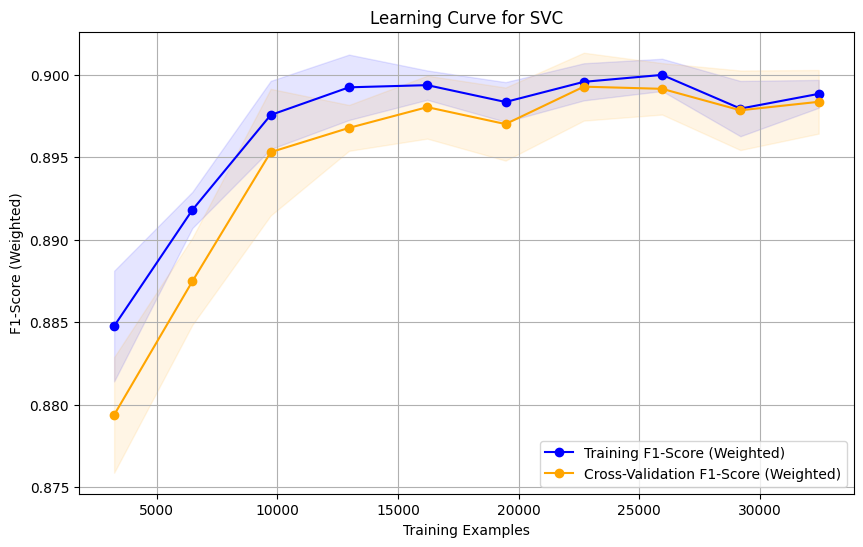

In [ ]:
train_sizes, train_scores, val_scores = learning_curve(
    svc,
    X_train,
    y_train,
    train_sizes=train_sizes,
    cv=5,
    scoring='f1_weighted',
    random_state=42,
    n_jobs=-1
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training F1-Score (Weighted)', color='blue', marker='o')
plt.plot(train_sizes, val_mean, label='Cross-Validation F1-Score (Weighted)', color='orange', marker='o')

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.1)
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color='orange', alpha=0.1)

plt.xlabel('Training Examples')
plt.ylabel('F1-Score (Weighted)')
plt.title('Learning Curve for SVC')
plt.legend(loc='best')
plt.grid(True)
plt.savefig('learning_curve_svc.png')
plt.show()

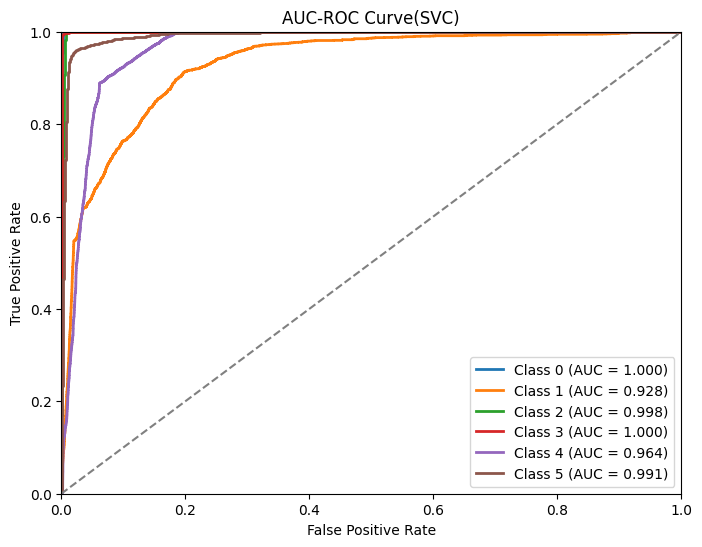

In [ ]:
y_probs = svc.predict_proba(X_test)
num_classes = len(np.unique(y_test))
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

plt.figure(figsize=(8,6))
for i in range(num_classes):
  fpr, tpr, _ = roc_curve(y_test_bin[:,i], y_probs[:,i])
  SVC_roc_auc = auc(fpr,tpr)
  plt.plot(fpr,tpr, lw=2, label=f'Class {i} (AUC = {SVC_roc_auc:.3f})')

plt.plot([0,1],[0,1], color='gray', linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve(SVC)')
plt.legend(loc='lower right')
plt.savefig('AUC-ROC Curve (SVC)')
plt.show()

In [ ]:
SVC_accuracy = accuracy_score(y_test, y_pred_svc)
SVC_precision = precision_score(y_test, y_pred_svc, average='macro', zero_division=0)
SVC_recall = recall_score(y_test, y_pred_svc, average='macro', zero_division=0)
SVC_f1 = f1_score(y_test, y_pred_svc, average='macro', zero_division=0)

In [ ]:
print("Accuracy:  {:.3f}".format(SVC_accuracy))
print("Precision: {:.3f}".format(SVC_precision))
print("Recall:    {:.3f}".format(SVC_recall))
print("F1 score:  {:.3f}".format(SVC_f1))
print("ROC Score: {:.3f}".format(SVC_roc_auc))

Accuracy:  0.898
Precision: 0.896
Recall:    0.898
F1 score:  0.895
ROC Score: 0.991


Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbc = GradientBoostingClassifier(n_estimators=10, learning_rate=0.1, max_depth=5, random_state=101)

In [ ]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=5, n_estimators=10, random_state=101)

In [ ]:
y_pred_gbc = gbc.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_gbc, zero_division=0))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2895
           1       0.93      0.75      0.83      2895
           2       0.98      0.99      0.99      2896
           3       0.99      1.00      1.00      2896
           4       0.85      0.94      0.89      2896
           5       0.95      1.00      0.97      2896

    accuracy                           0.94     17374
   macro avg       0.95      0.94      0.94     17374
weighted avg       0.95      0.94      0.94     17374



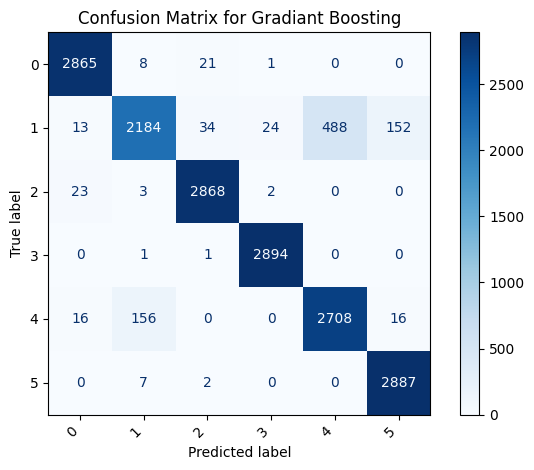

In [ ]:
cm = confusion_matrix(y_test, y_pred_gbc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for Gradiant Boosting')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('confusion_matrix_gradiant_boosting.png')
plt.show()

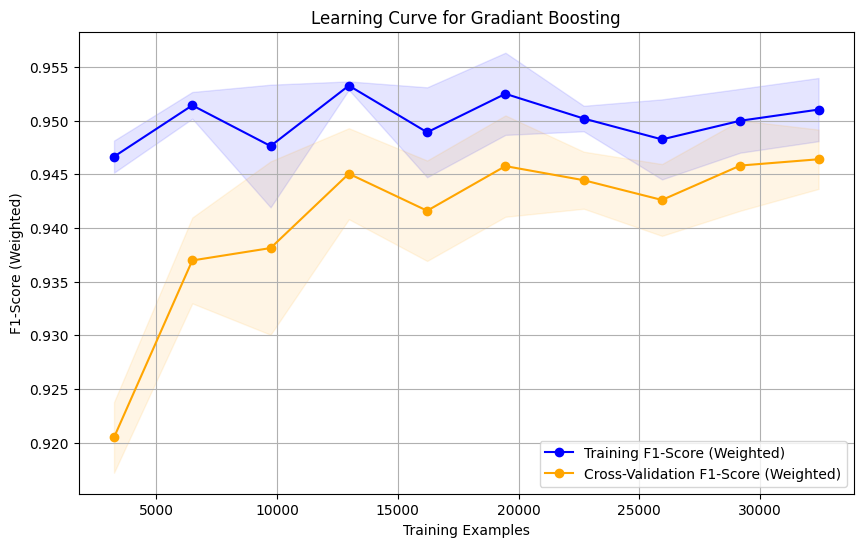

In [ ]:
train_sizes = np.linspace(0.1, 1.0, 10)
train_sizes, train_scores, val_scores = learning_curve(
    gbc,
    X_train,
    y_train,
    train_sizes=train_sizes,
    cv=5,
    scoring='f1_weighted',
    random_state=42,
    n_jobs=-1
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training F1-Score (Weighted)', color='blue', marker='o')
plt.plot(train_sizes, val_mean, label='Cross-Validation F1-Score (Weighted)', color='orange', marker='o')

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.1)
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color='orange', alpha=0.1)

plt.xlabel('Training Examples')
plt.ylabel('F1-Score (Weighted)')
plt.title('Learning Curve for Gradiant Boosting')
plt.legend(loc='best')
plt.grid(True)
plt.savefig('learning_curve_gradiant_boosting.png')
plt.show()

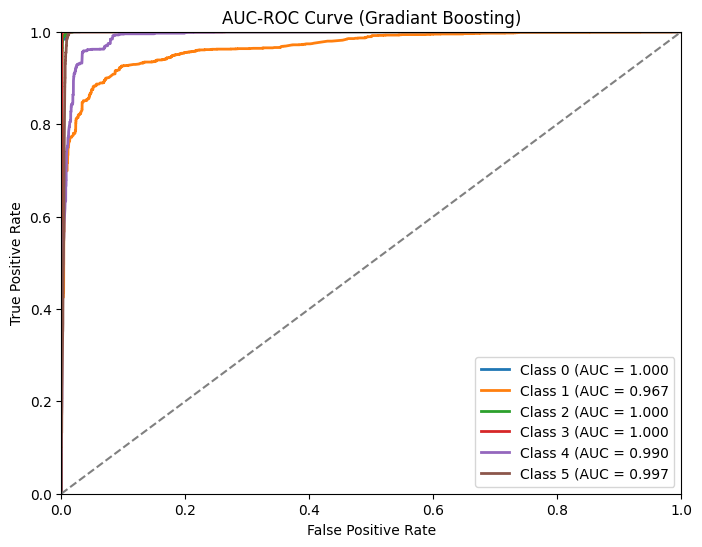

In [ ]:
y_probs = gbc.predict_proba(X_test)
num_classes = len(np.unique(y_test))
y_test_bin = label_binarize(y_test, classes = np.unique(y_test))

plt.figure(figsize=(8,6))
for i in range(num_classes):
  fpr,tpr, _ = roc_curve(y_test_bin[:,i], y_probs[:, i])
  GBC_roc_auc = auc(fpr, tpr)
  plt.plot(fpr,tpr, lw=2, label=f'Class {i} (AUC = {GBC_roc_auc:.3f}')


plt.plot([0,1],[0,1], color='gray', linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve (Gradiant Boosting)')
plt.legend(loc='lower right')
plt.savefig('AUC-ROC Curve of Gradiant Boosting')
plt.show()

In [ ]:
metrics = evaluate_multiclass(y_test, y_pred_gbc, y_probs)
print(metrics)

{'Accuracy': 0.9442845631403246, 'Precision (Macro)': 0.9452068527639536, 'Recall (Macro)': 0.9442762454794416, 'F1 Score (Macro)': 0.9427987988116627, 'ROC AUC Score (Macro)': np.float64(0.9921261347045989)}


In [ ]:
GBC_accuracy = accuracy_score(y_test, y_pred_gbc)
GBC_precision = precision_score(y_test, y_pred_gbc, average='macro', zero_division=0)
GBC_recall = recall_score(y_test, y_pred_gbc, average='macro', zero_division=0)
GBC_f1 = f1_score(y_test, y_pred_gbc, average='macro', zero_division=0)

In [ ]:
print("Accuracy:  {:.3f}".format(GBC_accuracy))
print("Precision: {:.3f}".format(GBC_precision))
print("Recall:    {:.3f}".format(GBC_recall))
print("F1 score:  {:.3f}".format(GBC_f1))
print("ROC Score: {:.3f}".format(GBC_roc_auc))

Accuracy:  0.944
Precision: 0.945
Recall:    0.944
F1 score:  0.943
ROC Score: 0.997


### **XGB Classifier**

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier(random_state=42, scale_pos_weight=sum(y_train==0)/sum(y_train==1))

In [ ]:
xgb.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:41:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
xgb_pred = xgb.predict(X_test)

In [ ]:
print("\nAccuracy:", accuracy_score(y_test, xgb_pred))
print("XGBoost Report:\n", classification_report(y_test, xgb_pred))


Accuracy: 0.9951651893634166
XGBoost Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2895
           1       1.00      0.97      0.99      2895
           2       1.00      1.00      1.00      2896
           3       1.00      1.00      1.00      2896
           4       0.99      1.00      1.00      2896
           5       0.99      1.00      0.99      2896

    accuracy                           1.00     17374
   macro avg       1.00      1.00      1.00     17374
weighted avg       1.00      1.00      1.00     17374



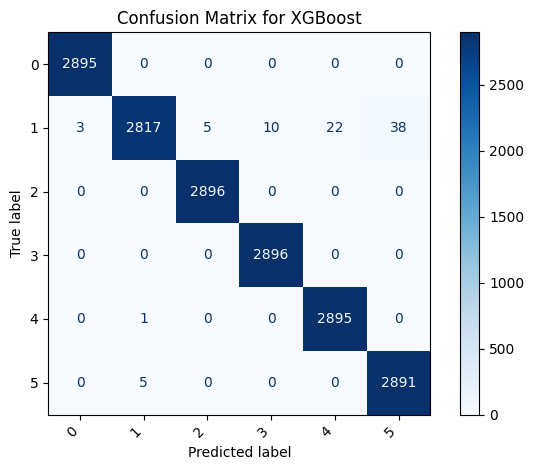

In [ ]:
cm = confusion_matrix(y_test, xgb_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for XGBoost')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('confusion_matrix_xgboost.png')
plt.show()

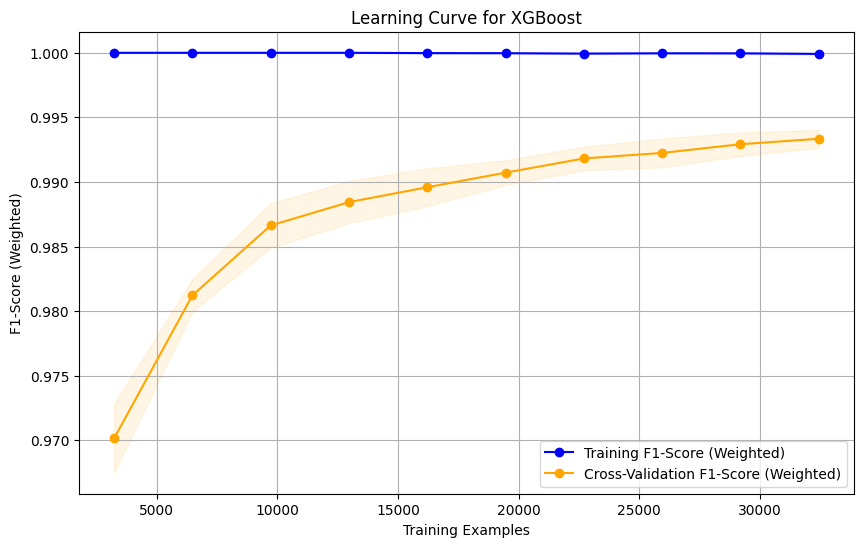

In [ ]:
train_sizes = np.linspace(0.1, 1.0, 10)
train_sizes, train_scores, val_scores = learning_curve(
    xgb,
    X_train,
    y_train,
    train_sizes=train_sizes,
    cv=5,
    scoring='f1_weighted',
    random_state=42,
    n_jobs=-1
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training F1-Score (Weighted)', color='blue', marker='o')
plt.plot(train_sizes, val_mean, label='Cross-Validation F1-Score (Weighted)', color='orange', marker='o')

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.1)
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color='orange', alpha=0.1)

plt.xlabel('Training Examples')
plt.ylabel('F1-Score (Weighted)')
plt.title('Learning Curve for XGBoost')
plt.legend(loc='best')
plt.grid(True)
plt.savefig('learning_curve_xgboost.png')
plt.show()

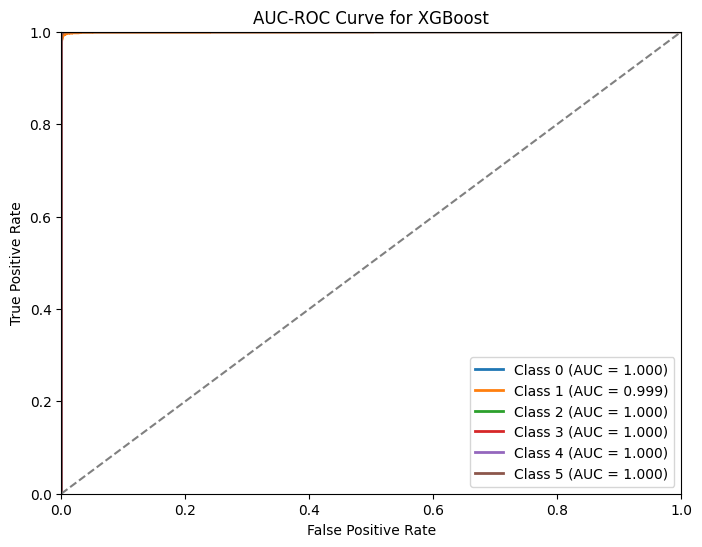

In [ ]:
y_test_bin = label_binarize(y_test, classes=np.unique(y_train))
num_classes = y_test_bin.shape[1]

y_probs = xgb.predict_proba(X_test)

plt.figure(figsize=(8,6))
for i in range(num_classes):
  fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_probs[:, i])
  XGB_roc_auc = auc(fpr,tpr)
  plt.plot(fpr,tpr, lw=2, label=f'Class {i} (AUC = {XGB_roc_auc:.3f})')


plt.plot([0,1],[0,1], color="gray", linestyle="--")

plt.xlim([0.0,1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC-ROC Curve for XGBoost")
plt.legend(loc="lower right")
plt.savefig('AUC-ROC Curve for xgboost')
plt.show()

In [ ]:
XGB_accuracy = accuracy_score(y_test, xgb_pred)
XGB_precision = precision_score(y_test, xgb_pred, average='macro', zero_division=0)
XGB_recall = recall_score(y_test, xgb_pred, average='macro', zero_division=0)
XGB_f1 = f1_score(y_test, xgb_pred, average='macro', zero_division=0)

In [ ]:
print("Accuracy:  {:.3f}".format(XGB_accuracy))
print("Precision: {:.3f}".format(XGB_precision))
print("Recall:    {:.3f}".format(XGB_recall))
print("F1 score:  {:.3f}".format(XGB_f1))
print("ROC Score: {:.3f}".format(XGB_roc_auc))

Accuracy:  0.995
Precision: 0.995
Recall:    0.995
F1 score:  0.995
ROC Score: 1.000


### **Neural Network (ANN)**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.callbacks import EarlyStopping
from itertools import cycle

In [ ]:

X_train.shape

(40538, 6)

In [ ]:
Early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [ ]:
model = Sequential()

In [ ]:
model.add(Input(shape=(6, )))

In [ ]:
model.add(Dense(48, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(24, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(12, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(6, activation='softmax'))

In [ ]:

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x=X_train, y=y_train,
          validation_data=(X_test, y_test),
          batch_size=128, epochs=600, callbacks=[Early_stop])

Epoch 1/600
317/317 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.3751 - loss: 1.6446 - val_accuracy: 0.8076 - val_loss: 0.6181
Epoch 2/600
317/317 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7117 - loss: 0.7905 - val_accuracy: 0.8675 - val_loss: 0.3976
Epoch 3/600
317/317 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7809 - loss: 0.5903 - val_accuracy: 0.8893 - val_loss: 0.3191
Epoch 4/600
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8073 - loss: 0.5086 - val_accuracy: 0.8929 - val_loss: 0.2912
Epoch 5/600
317/317 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8314 - loss: 0.4622 - val_accuracy: 0.9073 - val_loss: 0.2636
Epoch 6/600
317/317 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8533 - loss: 0.4147 - val_accuracy: 0.9107 - val_loss: 0.2457
Epoch 7/600
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8624 - loss: 0.3980 - val_accuracy: 0.9166 - val_loss: 0.2363
Epoch 8/600
317/317 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8695 - loss: 0.3715 - val_accu

In [ ]:

model_loss = pd.DataFrame(model.history.history)

<Axes: >

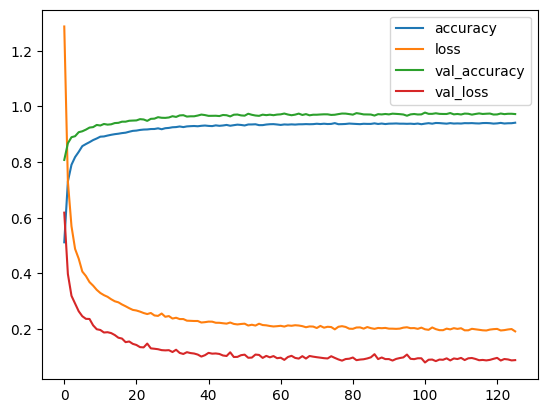

In [ ]:
model_loss.plot()

In [ ]:
predict = model.predict(X_test)

543/543 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [ ]:
predict[0]

array([9.9888074e-01, 1.0781904e-03, 7.0806145e-08, 1.8838133e-05,
       1.8128552e-05, 3.9671368e-06], dtype=float32)

In [ ]:
np.argmax(predict[0])

np.int64(0)

In [ ]:
predict_label = [np.argmax(i) for i in predict]

In [ ]:
print(classification_report(y_test, predict_label))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2895
           1       1.00      0.85      0.91      2895
           2       0.99      1.00      0.99      2896
           3       0.99      1.00      0.99      2896
           4       0.94      1.00      0.97      2896
           5       0.94      1.00      0.97      2896

    accuracy                           0.97     17374
   macro avg       0.97      0.97      0.97     17374
weighted avg       0.97      0.97      0.97     17374



In [ ]:
# Calculate metrics
ANN_accuracy = accuracy_score(y_test, predict_label)
ANN_precision = precision_score(y_test, predict_label, average='macro', zero_division=0)
ANN_recall = recall_score(y_test, predict_label, average='macro', zero_division=0)
ANN_f1 = f1_score(y_test, predict_label, average='macro', zero_division=0)
ANN_roc_auc = roc_auc_score(y_test, y_probs, multi_class='ovr', average='macro')

In [ ]:
# Print metrics with three decimal places
print("Accuracy:  {:.3f}".format(ANN_accuracy))
print("Precision: {:.3f}".format(ANN_precision))
print("Recall:    {:.3f}".format(ANN_recall))
print("F1 score:  {:.3f}".format(ANN_f1))
print("ROC Score: {:.3f}".format(ANN_roc_auc))

Accuracy:  0.973
Precision: 0.974
Recall:    0.973
F1 score:  0.972
ROC Score: 0.997


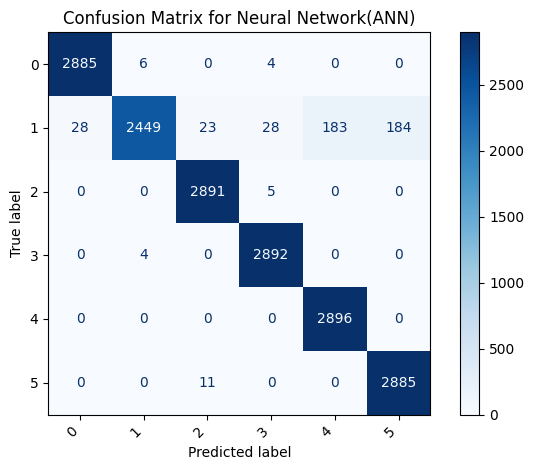

In [ ]:
cm = confusion_matrix(y_test, predict_label)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for Neural Network(ANN)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('confusion_matrix_neural_network.png')
plt.show()

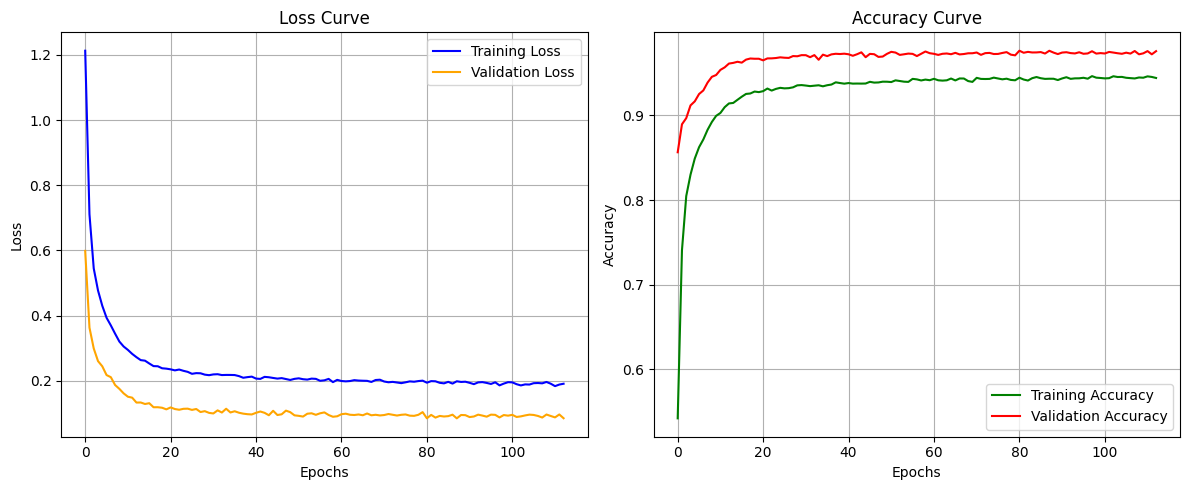

In [ ]:
plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
plt.plot(model_loss['loss'], label='Training Loss', color='blue')
plt.plot(model_loss['val_loss'], label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.grid(True)


plt.subplot(1, 2, 2)
plt.plot(model_loss['accuracy'], label='Training Accuracy', color='green')
plt.plot(model_loss['val_accuracy'], label='Validation Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig("learning_curves_ann.png")
plt.show()

543/543 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


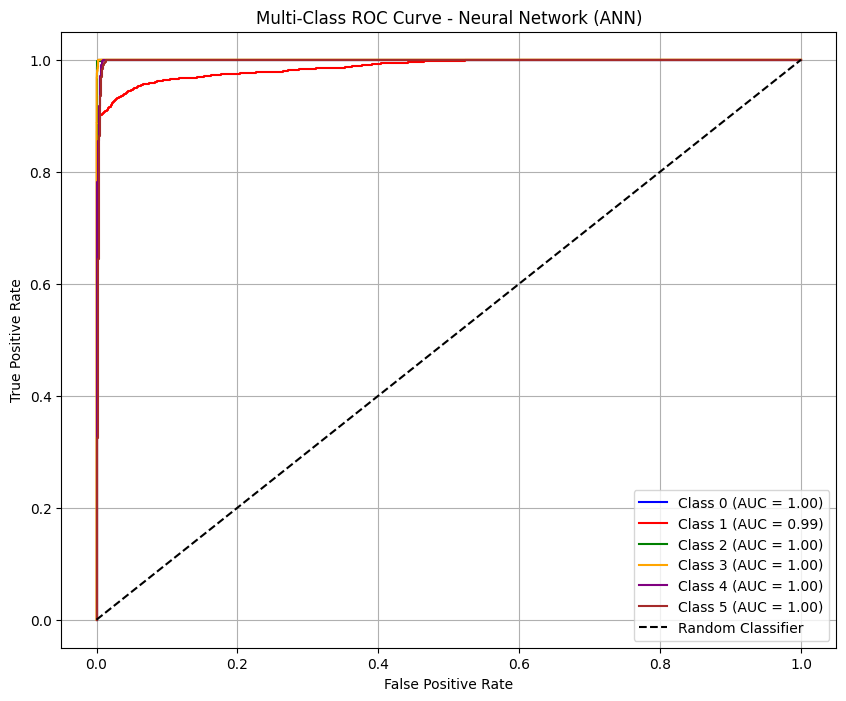

In [ ]:
n_classes = 6  # for 0 to 5
y_test_bin = label_binarize(y_test, classes=list(range(n_classes)))

y_probs = model.predict(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown']
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i],
             label=f'Class {i} (AUC = {roc_auc[i]:.2f})')


plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve - Neural Network (ANN)')
plt.legend(loc='lower right')
plt.grid(True)
plt.savefig("roc_curve_neural_network.png")
plt.show()

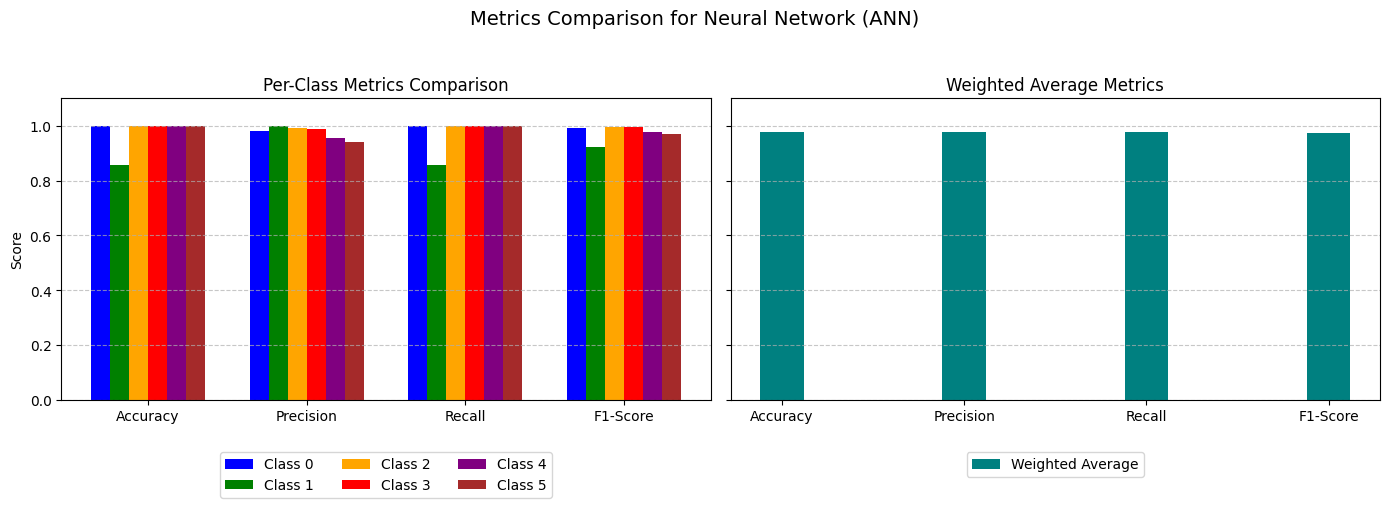

In [ ]:
accuracy = accuracy_score(y_test, predict_label)

precision = precision_score(y_test, predict_label, average=None, zero_division=0)
recall = recall_score(y_test, predict_label, average=None, zero_division=0)
f1 = f1_score(y_test, predict_label, average=None, zero_division=0)

precision_weighted = precision_score(y_test, predict_label, average='weighted', zero_division=0)
recall_weighted = recall_score(y_test, predict_label, average='weighted', zero_division=0)
f1_weighted = f1_score(y_test, predict_label, average='weighted', zero_division=0)

class_accuracies = []
for i in range(6):
    class_mask = (y_test == i)
    if class_mask.sum() > 0:
        class_acc = accuracy_score(y_test[class_mask], np.array(predict_label)[class_mask])
    else:
        class_acc = 0
    class_accuracies.append(class_acc)

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
class_metrics = np.array([class_accuracies, precision, recall, f1]).T
weighted_metrics = [accuracy, precision_weighted, recall_weighted, f1_weighted]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

x = np.arange(len(metrics))
width = 0.12

colors = ['blue', 'green', 'orange', 'red', 'purple', 'brown']
for i in range(6):
    ax1.bar(x + (i - 2.5) * width, class_metrics[i], width, label=f'Class {i}', color=colors[i])

ax1.set_xticks(x)
ax1.set_xticklabels(metrics)
ax1.set_title('Per-Class Metrics Comparison')
ax1.set_ylabel('Score')
ax1.set_ylim(0, 1.1)
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)
ax1.grid(True, axis='y', linestyle='--', alpha=0.7)

ax2.bar(x, weighted_metrics, width * 2, color='teal', label='Weighted Average')
ax2.set_xticks(x)
ax2.set_xticklabels(metrics)
ax2.set_title('Weighted Average Metrics')
ax2.set_ylim(0, 1.1)
ax2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15))
ax2.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.suptitle('Metrics Comparison for Neural Network (ANN)', fontsize=14)
plt.tight_layout(rect=[0, 0.1, 1, 0.95])
plt.savefig('metrics_comparison_neural_network.png')
plt.show()

**AdaBoost vs. AdaBoost_HY Comparison**

In [ ]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']
adaboost_scores = [AdaBoost_accuracy, AdaBoost_precision, AdaBoost_recall, AdaBoost_f1, AdaBoost_roc_auc]
adaboost_hy_scores = [AdaBoost_HY_accuracy, AdaBoost_HY_precision, AdaBoost_HY_recall, AdaBoost_HY_f1, AdaBoost_HY_roc_auc]

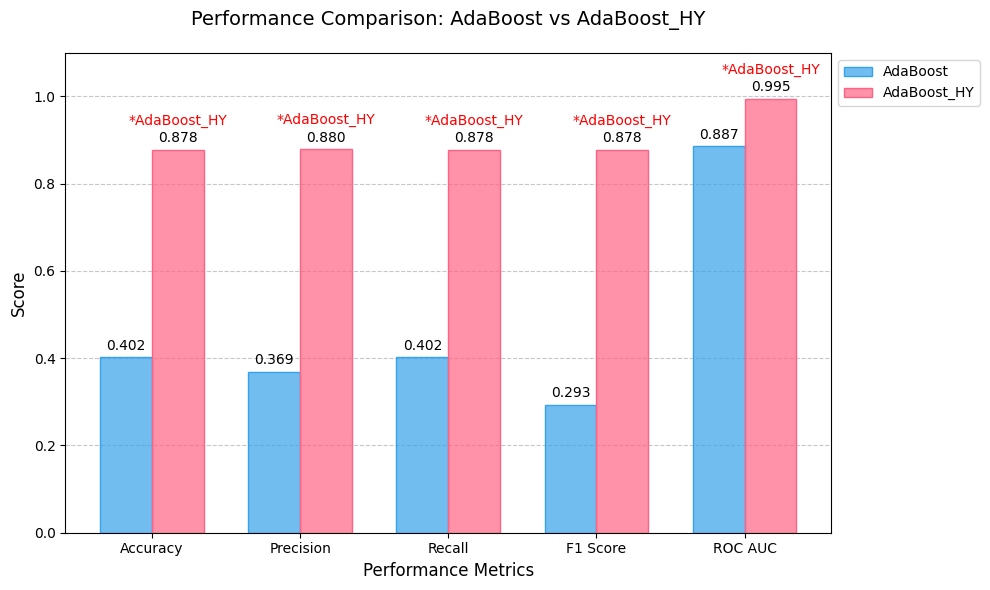

In [ ]:
# Colors to match previous Chart.js style
adaboost_facecolor = (54/255, 162/255, 235/255, 0.7)  # rgba(54, 162, 235, 0.7)
adaboost_edgecolor = (54/255, 162/255, 235/255, 1.0)  # rgba(54, 162, 235, 1)
adaboost_hy_facecolor = (255/255, 99/255, 132/255, 0.7)  # rgba(255, 99, 132, 0.7)
adaboost_hy_edgecolor = (255/255, 99/255, 132/255, 1.0)  # rgba(255, 99, 132, 1)

# Plotting the bar chart
x = np.arange(len(metrics))  # Label locations
width = 0.35  # Width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, adaboost_scores, width, label='AdaBoost',
               color=adaboost_facecolor, edgecolor=adaboost_edgecolor, linewidth=1)
bars2 = ax.bar(x + width/2, adaboost_hy_scores, width, label='AdaBoost_HY',
               color=adaboost_hy_facecolor, edgecolor=adaboost_hy_edgecolor, linewidth=1)

# Add labels, title, and legend
ax.set_xlabel('Performance Metrics', fontsize=12)
ax.set_ylabel('Score', fontsize=12)
ax.set_title('Performance Comparison: AdaBoost vs AdaBoost_HY', fontsize=14, pad=20)
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylim(0, 1.1)  # Increase y-limit to ensure score labels fit

# Move legend outside the plot
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=10)

# Add grid
ax.grid(True, axis='y', linestyle='--', alpha=0.7)
ax.set_axisbelow(True)  # Grid behind bars

# Add value labels and identify best model
for i, (bar1, bar2) in enumerate(zip(bars1, bars2)):
    h1, h2 = bar1.get_height(), bar2.get_height()
    # Add score labels slightly below top to avoid border cutoff
    ax.text(bar1.get_x() + bar1.get_width()/2., h1 + 0.01, f'{h1:.3f}',
            ha='center', va='bottom', fontsize=10)
    ax.text(bar2.get_x() + bar2.get_width()/2., h2 + 0.01, f'{h2:.3f}',
            ha='center', va='bottom', fontsize=10)
    # Highlight best model with an asterisk
    if h1 > h2:
        ax.text(bar1.get_x() + bar1.get_width()/2., h1 + 0.05, '*AdaBoost',
                ha='center', va='bottom', fontsize=10, color='blue')
    elif h2 > h1:
        ax.text(bar2.get_x() + bar2.get_width()/2., h2 + 0.05, '*AdaBoost_HY',
                ha='center', va='bottom', fontsize=10, color='red')

# Adjust layout to prevent clipping of legend
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('adaboost_vs_adaboost_hy_comparison.png', bbox_inches='tight', dpi=300)

# Display the plot
plt.show()

## **Model Comparisons**

In [ ]:
from matplotlib import cm

In [ ]:
models = ['ANN', 'XGB_HY', 'GBC_HY', 'SVC_HY', 'AdaBoost_HY', 'RF']
accuracy_scores = [ANN_accuracy, XGB_accuracy, GBC_accuracy, SVC_accuracy, AdaBoost_HY_accuracy, RF_accuracy]
precision_scores = [ANN_precision, XGB_precision, GBC_precision, SVC_precision, AdaBoost_HY_precision, RF_precision]
recall_scores = [ANN_recall, XGB_recall, GBC_recall, SVC_recall, AdaBoost_HY_recall, RF_recall]
f1_scores = [ANN_f1, XGB_f1, GBC_f1, SVC_f1, AdaBoost_HY_f1, RF_f1]
roc_auc_scores = [ANN_roc_auc, XGB_roc_auc, GBC_roc_auc, SVC_roc_auc, AdaBoost_HY_roc_auc, RF_roc_auc]

In [ ]:
# Viridis color palette (6 distinct colors for the 6 models)
viridis = cm.get_cmap('viridis', 6)
colors = [viridis(i / 5) for i in range(6)]  # Evenly spaced colors from Viridis
edge_colors = [color for color in colors]  # Use same colors for edges (no alpha change)

<ipython-input-151-6c5504cef59a>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  viridis = cm.get_cmap('viridis', 6)


In [ ]:
# Function to create and save a bar chart for a given metric
def plot_metric(metric_name, scores, file_name):
    x = np.arange(len(models))  # Label locations
    width = 0.12  # Narrower bars to fit six models

    fig, ax = plt.subplots(figsize=(8, 6))  # Wider figure for readability
    bars = ax.bar(x, scores, width, label=models, color=colors, edgecolor=edge_colors, linewidth=1)

    # Add labels, title, and legend
    ax.set_xlabel('Models', fontsize=12)
    ax.set_ylabel('Score', fontsize=12)
    ax.set_title(f'{metric_name} Comparison Across Models', fontsize=14, pad=20)
    ax.set_xticks(x)
    ax.set_xticklabels(models, rotation=45, ha='right', fontsize=10)
    ax.set_ylim(0, 1.1)  # Ensure score labels fit

    # Move legend outside the plot
    ax.legend(models, loc='upper left', bbox_to_anchor=(1, 1), fontsize=10, frameon=True)

    # Add grid
    ax.grid(True, axis='y', linestyle='--', alpha=0.7)
    ax.set_axisbelow(True)  # Grid behind bars

    # Add value labels and identify best model
    max_score = max(scores)
    for i, bar in enumerate(bars):
        h = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., h + 0.01, f'{h:.3f}',
                ha='center', va='bottom', fontsize=10)
        if h == max_score:
            ax.text(bar.get_x() + bar.get_width()/2., h + 0.05, f'*{models[i]}',
                    ha='center', va='bottom', fontsize=10, color=edge_colors[i])

    # Adjust layout to prevent clipping
    plt.tight_layout()

    # Save the plot
    plt.savefig(file_name, bbox_inches='tight', dpi=300, format='png')
    plt.show()
    plt.close()

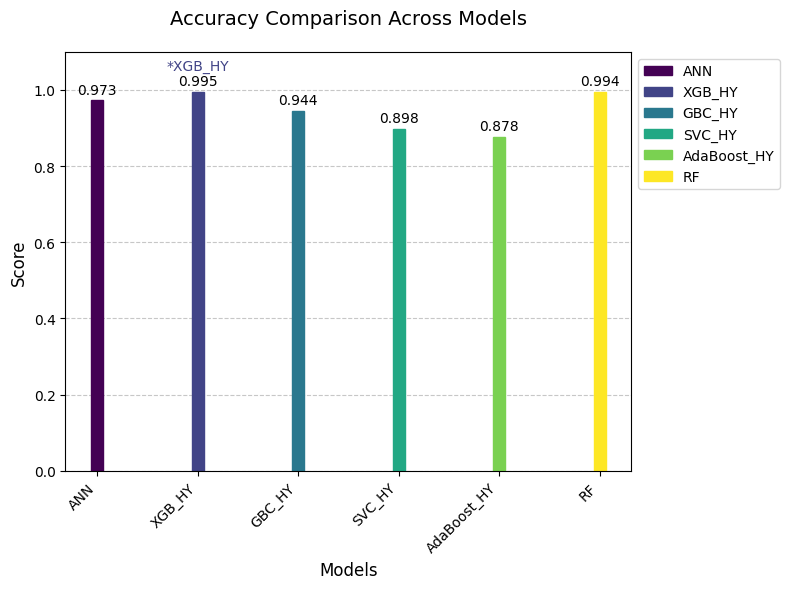

In [ ]:
plot_metric('Accuracy', accuracy_scores, 'accuracy_comparison_viridis.png')

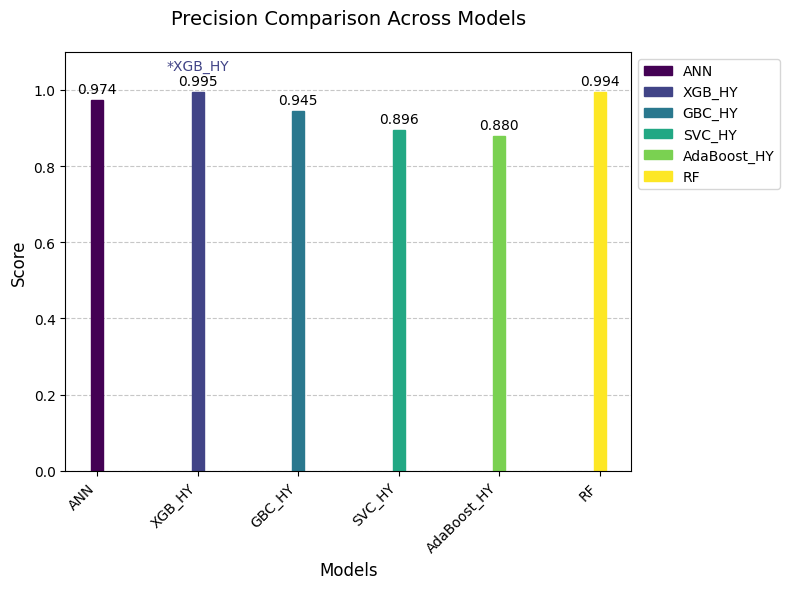

In [ ]:
plot_metric('Precision', precision_scores, 'precision_comparison_viridis.png')

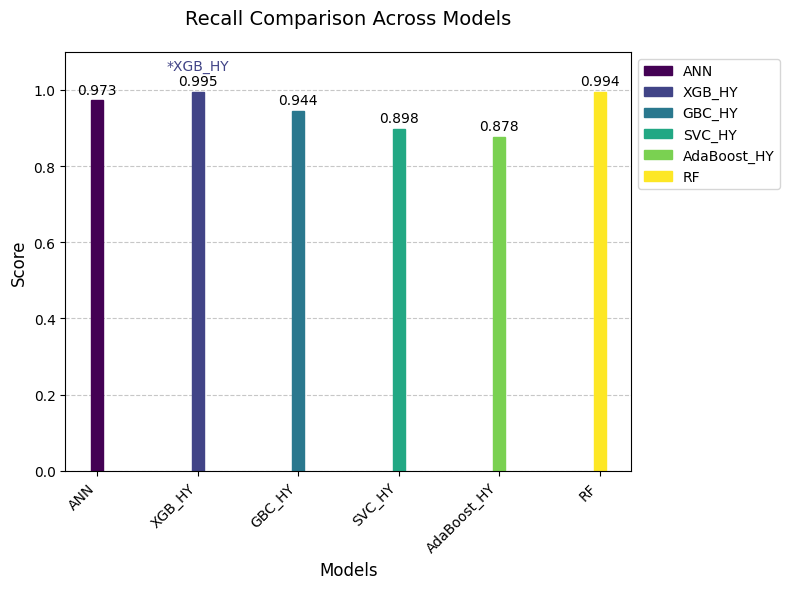

In [ ]:
plot_metric('Recall', recall_scores, 'recall_comparison_viridis.png')

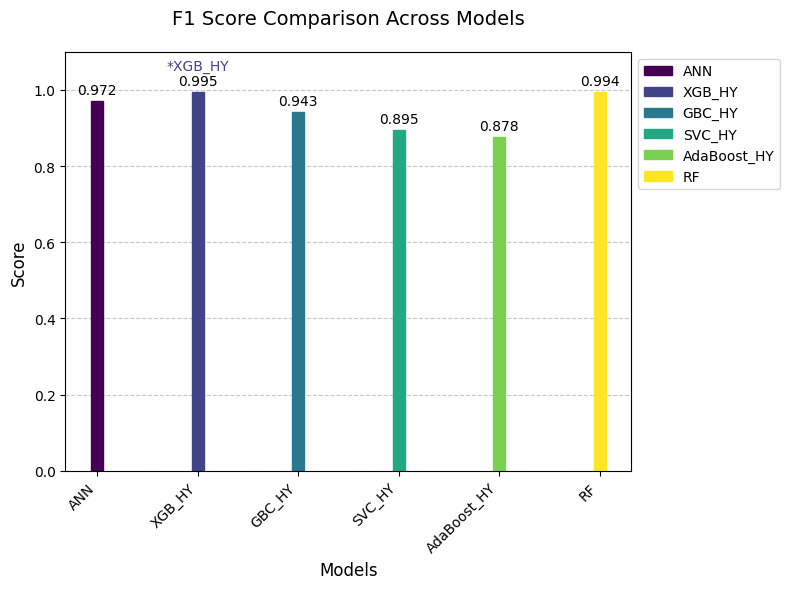

In [ ]:
plot_metric('F1 Score', f1_scores, 'f1_score_comparison_viridis.png')

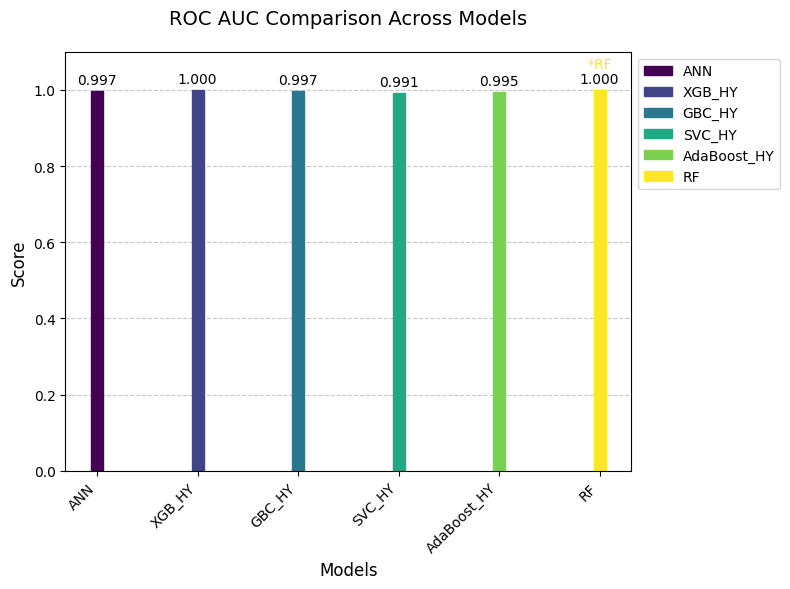

In [ ]:
plot_metric('ROC AUC', roc_auc_scores, 'roc_auc_comparison_viridis.png')

## **Overall Best Model Comparison**

In [ ]:
models = ['ANN', 'XGB_HY', 'GBC_HY', 'SVC_HY', 'AdaBoost_HY', 'RF']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']

In [ ]:
scores = [
    [ANN_accuracy, ANN_precision, ANN_recall, ANN_f1, ANN_roc_auc],  # ANN
    [XGB_accuracy, XGB_precision, XGB_recall, XGB_f1, XGB_roc_auc],  # XGB_HY
    [GBC_accuracy, GBC_precision, GBC_recall, GBC_f1, GBC_roc_auc],  # GBC_HY
    [SVC_accuracy, SVC_precision, SVC_recall, SVC_f1, SVC_roc_auc],  # SVC_HY
    [AdaBoost_HY_accuracy, AdaBoost_HY_precision, AdaBoost_HY_recall, AdaBoost_HY_f1, AdaBoost_HY_roc_auc],  # AdaBoost_HY
    [RF_accuracy, RF_precision, RF_recall, RF_f1, RF_roc_auc]  # RF
]

In [ ]:
# Calculate average score for each model to determine the overall best
average_scores = [np.mean(model_scores) for model_scores in scores]
best_model_idx = np.argmax(average_scores)
best_model = models[best_model_idx]
best_avg_score = average_scores[best_model_idx]

# Viridis color palette (6 distinct colors for the 6 models)
viridis = cm.get_cmap('viridis', 6)
colors = [viridis(i / 5) for i in range(6)]  # Evenly spaced colors from Viridis
edge_colors = [color for color in colors]  # Same colors for edges

<ipython-input-167-5051f244b3e0>:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  viridis = cm.get_cmap('viridis', 6)


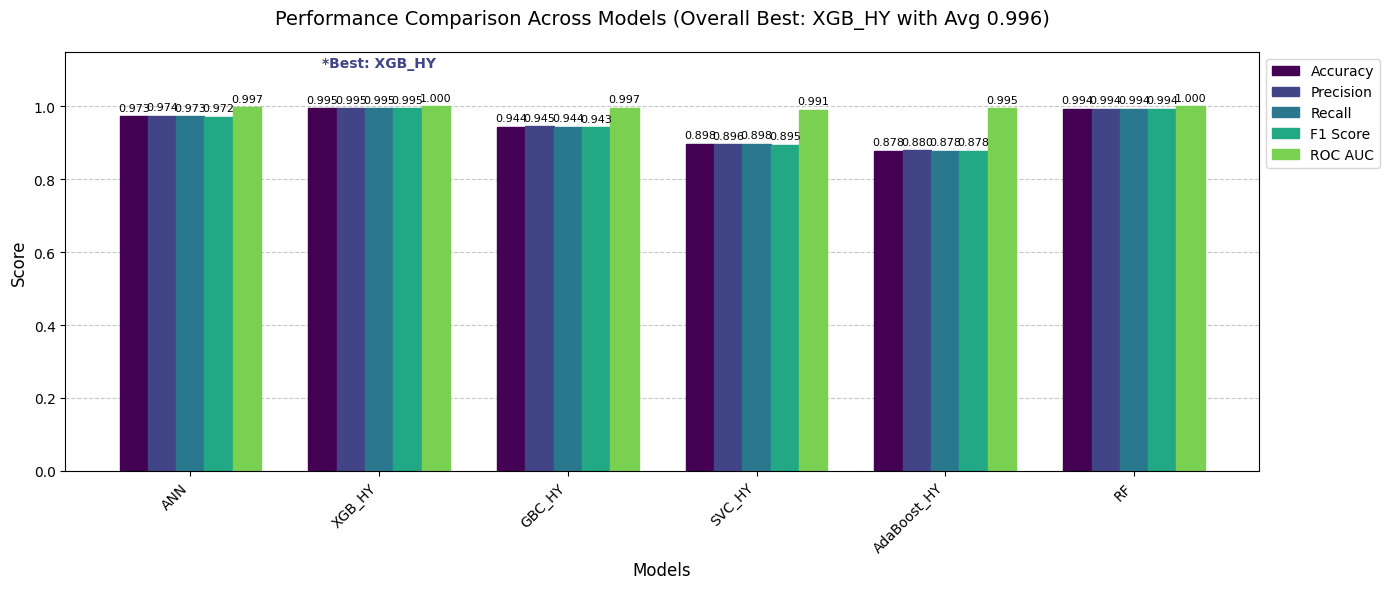

In [ ]:
# Plotting the grouped bar chart
x = np.arange(len(models))  # Model positions
width = 0.15  # Bar width (adjusted for 5 metrics per model)
fig, ax = plt.subplots(figsize=(14, 6))  # Wider figure for clarity

# Plot bars for each metric
for i, metric in enumerate(metrics):
    metric_scores = [scores[j][i] for j in range(len(models))]
    ax.bar(x + i * width - 2 * width, metric_scores, width, label=metric, color=colors[i], edgecolor=edge_colors[i], linewidth=1)

# Add labels, title, and legend
ax.set_xlabel('Models', fontsize=12)
ax.set_ylabel('Score', fontsize=12)
ax.set_title('Performance Comparison Across Models (Overall Best: {} with Avg {:.3f})'.format(best_model, best_avg_score),
             fontsize=14, pad=20)
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right', fontsize=10)
ax.set_ylim(0, 1.15)  # Increased y-limit for score labels and annotations

# Move legend outside the plot
ax.legend(metrics, loc='upper left', bbox_to_anchor=(1, 1), fontsize=10, frameon=True)

# Add grid
ax.grid(True, axis='y', linestyle='--', alpha=0.7)
ax.set_axisbelow(True)  # Grid behind bars

# Add value labels
for i, metric in enumerate(metrics):
    metric_scores = [scores[j][i] for j in range(len(models))]
    for j, score in enumerate(metric_scores):
        ax.text(x[j] + i * width - 2 * width, score + 0.01, f'{score:.3f}',
                ha='center', va='bottom', fontsize=8)

# Highlight the overall best model
ax.text(x[best_model_idx], 1.1, f'*Best: {best_model}',
        ha='center', va='bottom', fontsize=10, color=edge_colors[best_model_idx], weight='bold')

# Adjust layout to prevent clipping
plt.tight_layout()

# Save the plot
plt.savefig('overall_model_comparison_viridis.png', bbox_inches='tight', dpi=300, format='png')
plt.show()
plt.close()

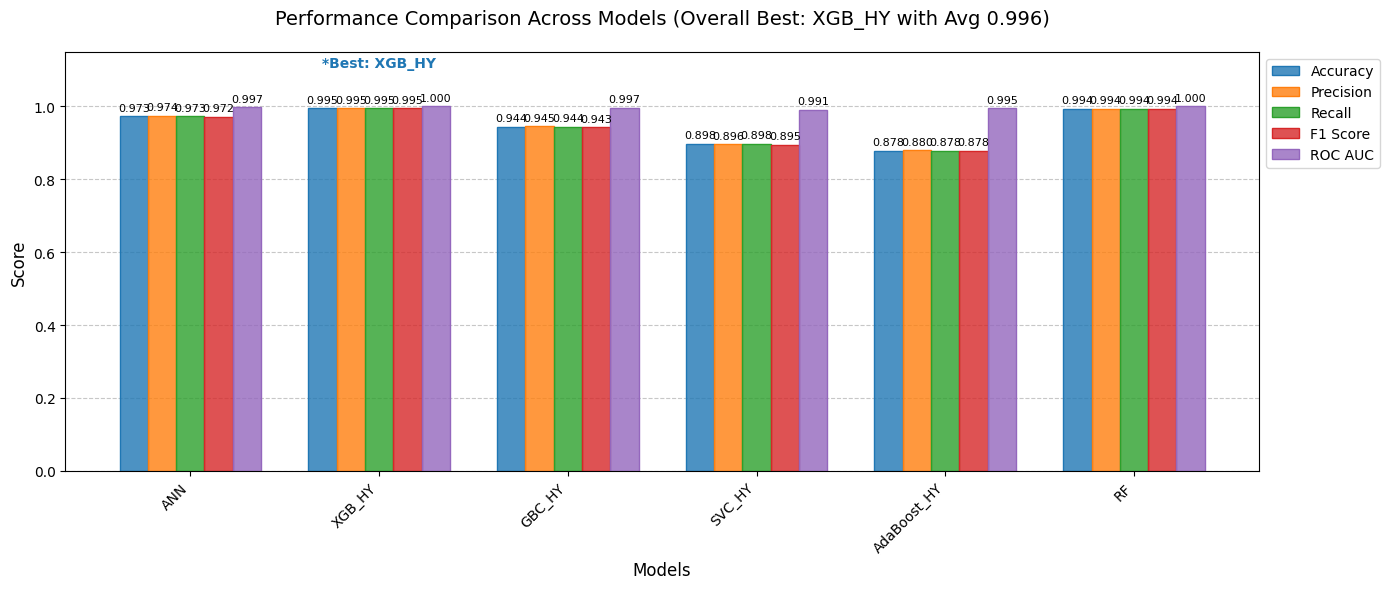

In [ ]:
# Tableau 10 color palette (professional, colorblind-friendly, suitable for conference papers)
colors = [
    (31/255, 119/255, 180/255, 0.8),  # Blue
    (255/255, 127/255, 14/255, 0.8),  # Orange
    (44/255, 160/255, 44/255, 0.8),   # Green
    (214/255, 39/255, 40/255, 0.8),   # Red
    (148/255, 103/255, 189/255, 0.8), # Purple
    (140/255, 86/255, 75/255, 0.8)    # Brown
]
edge_colors = [(r, g, b, 1.0) for r, g, b, a in colors]  # Solid edges

# Plotting the grouped bar chart
x = np.arange(len(models))  # Model positions
width = 0.15  # Bar width (adjusted for 5 metrics per model)
fig, ax = plt.subplots(figsize=(14, 6))  # Wider figure for clarity

# Plot bars for each metric
for i, metric in enumerate(metrics):
    metric_scores = [scores[j][i] for j in range(len(models))]
    ax.bar(x + i * width - 2 * width, metric_scores, width, label=metric, color=colors[i], edgecolor=edge_colors[i], linewidth=1)

# Add labels, title, and legend
ax.set_xlabel('Models', fontsize=12)
ax.set_ylabel('Score', fontsize=12)
ax.set_title('Performance Comparison Across Models (Overall Best: {} with Avg {:.3f})'.format(best_model, best_avg_score),
             fontsize=14, pad=20)
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right', fontsize=10)
ax.set_ylim(0, 1.15)  # Increased y-limit for score labels and annotations

# Move legend outside the plot
ax.legend(metrics, loc='upper left', bbox_to_anchor=(1, 1), fontsize=10, frameon=True)

# Add grid
ax.grid(True, axis='y', linestyle='--', alpha=0.7)
ax.set_axisbelow(True)  # Grid behind bars

# Add value labels
for i, metric in enumerate(metrics):
    metric_scores = [scores[j][i] for j in range(len(models))]
    for j, score in enumerate(metric_scores):
        ax.text(x[j] + i * width - 2 * width, score + 0.01, f'{score:.3f}',
                ha='center', va='bottom', fontsize=8)

# Highlight the overall best model
ax.text(x[best_model_idx], 1.1, f'*Best: {best_model}',
        ha='center', va='bottom', fontsize=10, color=edge_colors[0], weight='bold')

# Adjust layout to prevent clipping
plt.tight_layout()

# Save the plot
plt.savefig('overall_model_comparison_tableau10.png', bbox_inches='tight', dpi=300, format='png')
plt.show()
plt.close()